# Surprise Housing

### Problem statment
A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia.

The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.


The company wants to know:
Which variables are significant in predicting the price of a house, and
How well those variables describe the price of a house.
Also, determine the optimal value of lambda for ridge and lasso regression.


### Business Goal 
We are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.


The solution is divided into the following sections:

- Perform EDA
     - Load Data 
     - Explore and understand the data
     - Clean up the data if necessary
     - Prepare data for model building
- Build the Model
- Model Evaluation
    - Lasso and Ridge regression


   ### Load necessary libraries

In [1]:
import numpy as np
import pandas as pd

# For graphs
import matplotlib.pyplot as plt
import seaborn as sns

# To build the model
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

# To Scale our data
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import os
from sklearn.metrics import r2_score


# hide warnings
import warnings
warnings.filterwarnings('ignore')


pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)


%matplotlib inline

## 1. Perform EDA
Let's first load the data and have a look at the dataset and understand the size, attribute names etc.

### Load Data

In [2]:
# reading the dataset
surp_df = pd.read_csv(r"train.csv")
surp_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### Explore and understand the data

In [3]:
surp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4]:
surp_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [5]:
#check the missing data percentage
percent_missing = (surp_df.isnull().sum() / surp_df.isnull().count()*100).sort_values(ascending = False)
percent_missing.head(15)

PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
MasVnrType      59.726027
FireplaceQu     47.260274
LotFrontage     17.739726
GarageYrBlt      5.547945
GarageCond       5.547945
GarageType       5.547945
GarageFinish     5.547945
GarageQual       5.547945
BsmtFinType2     2.602740
BsmtExposure     2.602740
BsmtQual         2.534247
dtype: float64

### Clean up the data if necessary

In [6]:
# Dropping Columns with high missing values above 80% and unnecessary columns
surp_df.drop(['PoolQC','MiscFeature','Alley','Fence', 'FireplaceQu'],axis=1,inplace=True)

In [7]:
surp_df[['LotFrontage','MasVnrArea','GarageYrBlt']].describe()

,LotFrontage,MasVnrArea,GarageYrBlt
count,1201.000000,1452.000000,1379.000000
mean,70.049958,103.685262,1978.506164
std,24.284752,181.066207,24.689725
min,21.000000,0.000000,1900.000000
25%,59.000000,0.000000,1961.000000
50%,69.000000,0.000000,1980.000000
75%,80.000000,166.000000,2002.000000
max,313.000000,1600.000000,2010.000000


In [8]:
 #Treaing missing values by imputing for columns with missing values less than or equal to 80%

surp_df['LotFrontage']= surp_df.LotFrontage.fillna(surp_df.LotFrontage.median()) #Can see a presence of outlier so imputing the missing values through median
surp_df['MasVnrArea']= surp_df.MasVnrArea.fillna(surp_df.MasVnrArea.median())    # Can see presence of outlier
surp_df['GarageYrBlt']= surp_df.GarageYrBlt.fillna(surp_df.GarageYrBlt.mean())  # it looks stable with no outlier presence so we can use mean for imputation


<Axes: xlabel='GarageYrBlt', ylabel='Density'>

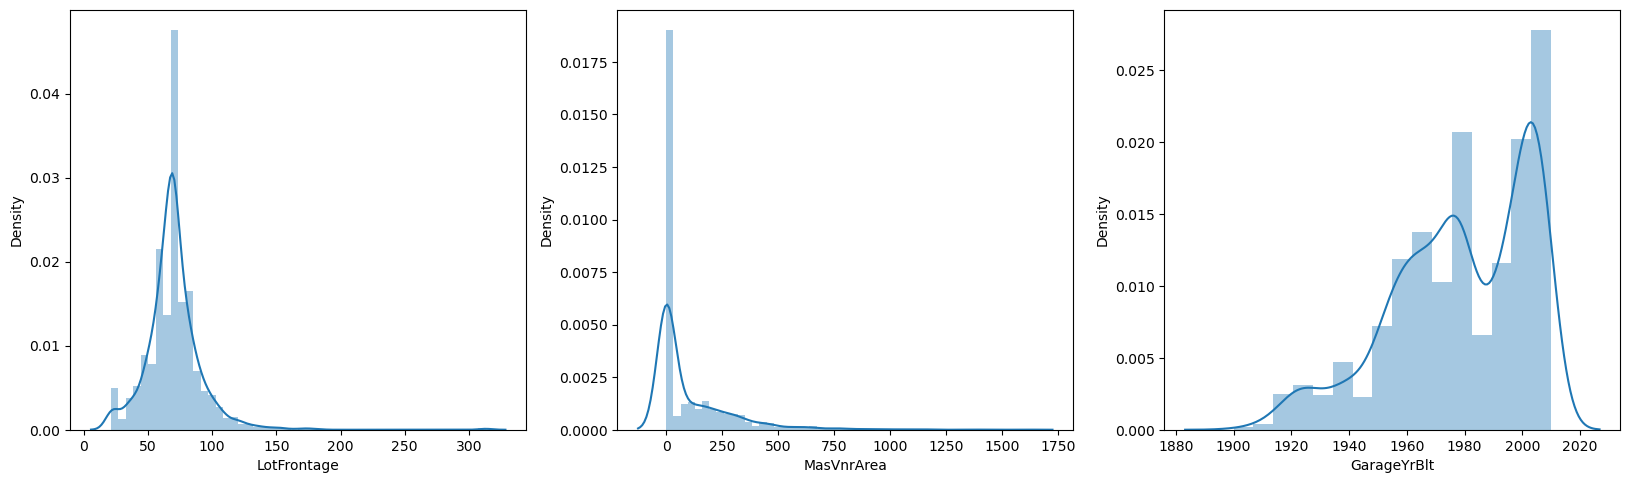

In [9]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.distplot(surp_df['LotFrontage'])
plt.subplot(2,3,2)
sns.distplot(surp_df['MasVnrArea'])
plt.subplot(2,3,3)
sns.distplot(surp_df['GarageYrBlt'])

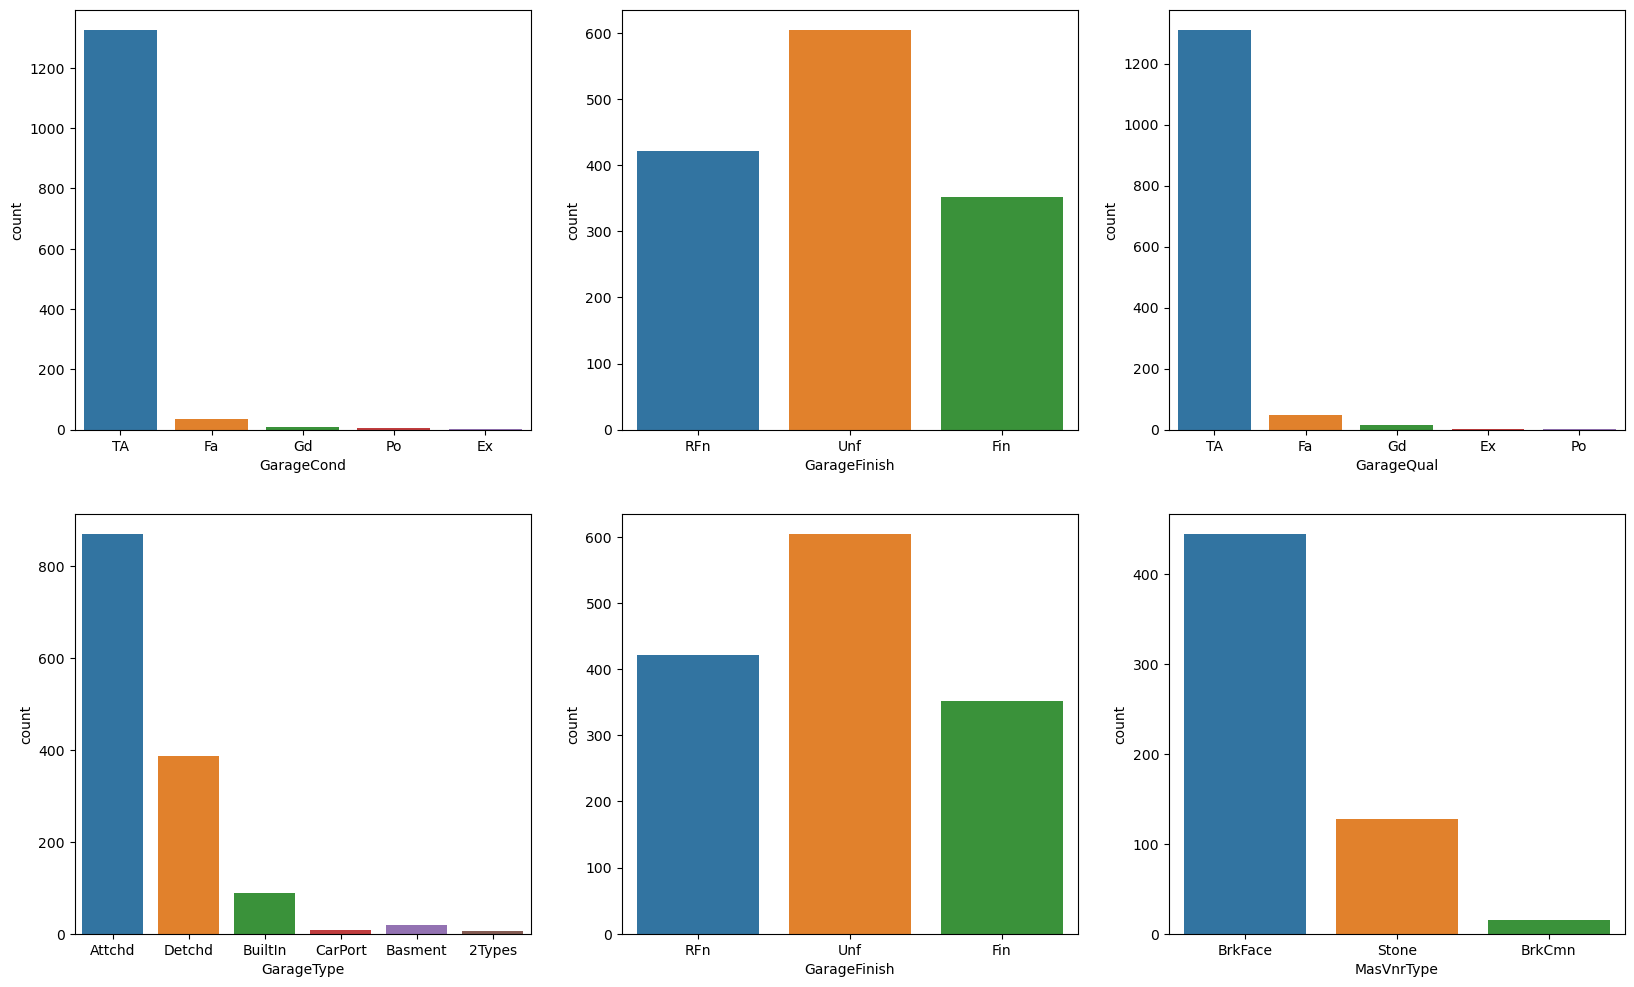

In [10]:
#Visualising the variables wih missing values

plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.countplot(x = 'GarageCond', data = surp_df)

plt.subplot(2,3,2)
sns.countplot(x = 'GarageFinish',  data = surp_df)

plt.subplot(2,3,3)
sns.countplot(x = 'GarageQual', data = surp_df)
plt.subplot(2,3,4)
sns.countplot(x = 'GarageType', data = surp_df)
plt.subplot(2,3,5)
sns.countplot(x = 'GarageFinish',  data = surp_df)
plt.subplot(2,3,6)
sns.countplot(x = 'MasVnrType', data = surp_df)
plt.show()

### Prepare data for model building

In [11]:

# Cases when the house doesn't have the garrage so replacing null with No Garrage

surp_df['GarageType'] = surp_df['GarageType'].replace(np.nan, 'No Garage')
surp_df['GarageFinish'] = surp_df['GarageFinish'].replace(np.nan, 'No Garage')
surp_df['GarageCond'] = surp_df['GarageCond'].replace(np.nan, 'No Garage')
surp_df['GarageQual'] = surp_df['GarageQual'].replace(np.nan, 'No Garage')
surp_df['MasVnrType'] = surp_df['MasVnrType'].replace(np.nan, 'None') # replacing nan with the top option of this field
surp_df['Electrical'] = surp_df['Electrical'].replace(np.nan, 'SBrkr') # replacing nan with the top option of this field


In [12]:
#changing num to categorical so as to form these as dummy variables 
surp_df['MSSubClass']=surp_df['MSSubClass'].replace({20:'1-STORY 1946 & NEWER ALL STYLES',30:'1-STORY 1945 & OLDER',40:'1-STORY W/FINISHED ATTIC ALL AGES',
        45:'1-1/2 STORY - UNFINISHED ALL AGES',
        50:'1-1/2 STORY FINISHED ALL AGES',
        60:'2-STORY 1946 & NEWER',
        70:'2-STORY 1945 & OLDER',
        75:'2-1/2 STORY ALL AGES',
        80:'SPLIT OR MULTI-LEVEL',
        85:'SPLIT FOYER',
        90:'DUPLEX - ALL STYLES AND AGES',
       120:'1-STORY PUD (Planned Unit Development) - 1946 & NEWER',
       150:'1-1/2 STORY PUD - ALL AGES',
       160:'2-STORY PUD - 1946 & NEWER',
       180:'PUD - MULTILEVEL - INCL SPLIT LEV/FOYER',
       190:'2 FAMILY CONVERSION - ALL STYLES AND AGES'})

surp_df['OverallQual']=surp_df['OverallQual'].replace({ 10:'Very Excellent',
       9:'Excellent',
       8:'Very Good',
       7:'Good',
       6:'Above Average',
       5:'Average',
       4:'Below Average',
       3:'Fair',
       2:'Poor',
       1:'Very Poor'})
surp_df['OverallCond']=surp_df['OverallCond'].replace({ 10:'Very Excellent',
       9:'Excellent',
       8:'Very Good',
       7:'Good',
       6:'Above Average',
       5:'Average',
       4:'Below Average',
       3:'Fair',
       2:'Poor',
       1:'Very Poor'})

In [13]:
surp_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,2-STORY 1946 & NEWER,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Good,Average,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,1-STORY 1946 & NEWER ALL STYLES,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Above Average,Very Good,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,2-STORY 1946 & NEWER,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Good,Average,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,2-STORY 1945 & OLDER,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Good,Average,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,2-STORY 1946 & NEWER,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Very Good,Average,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000


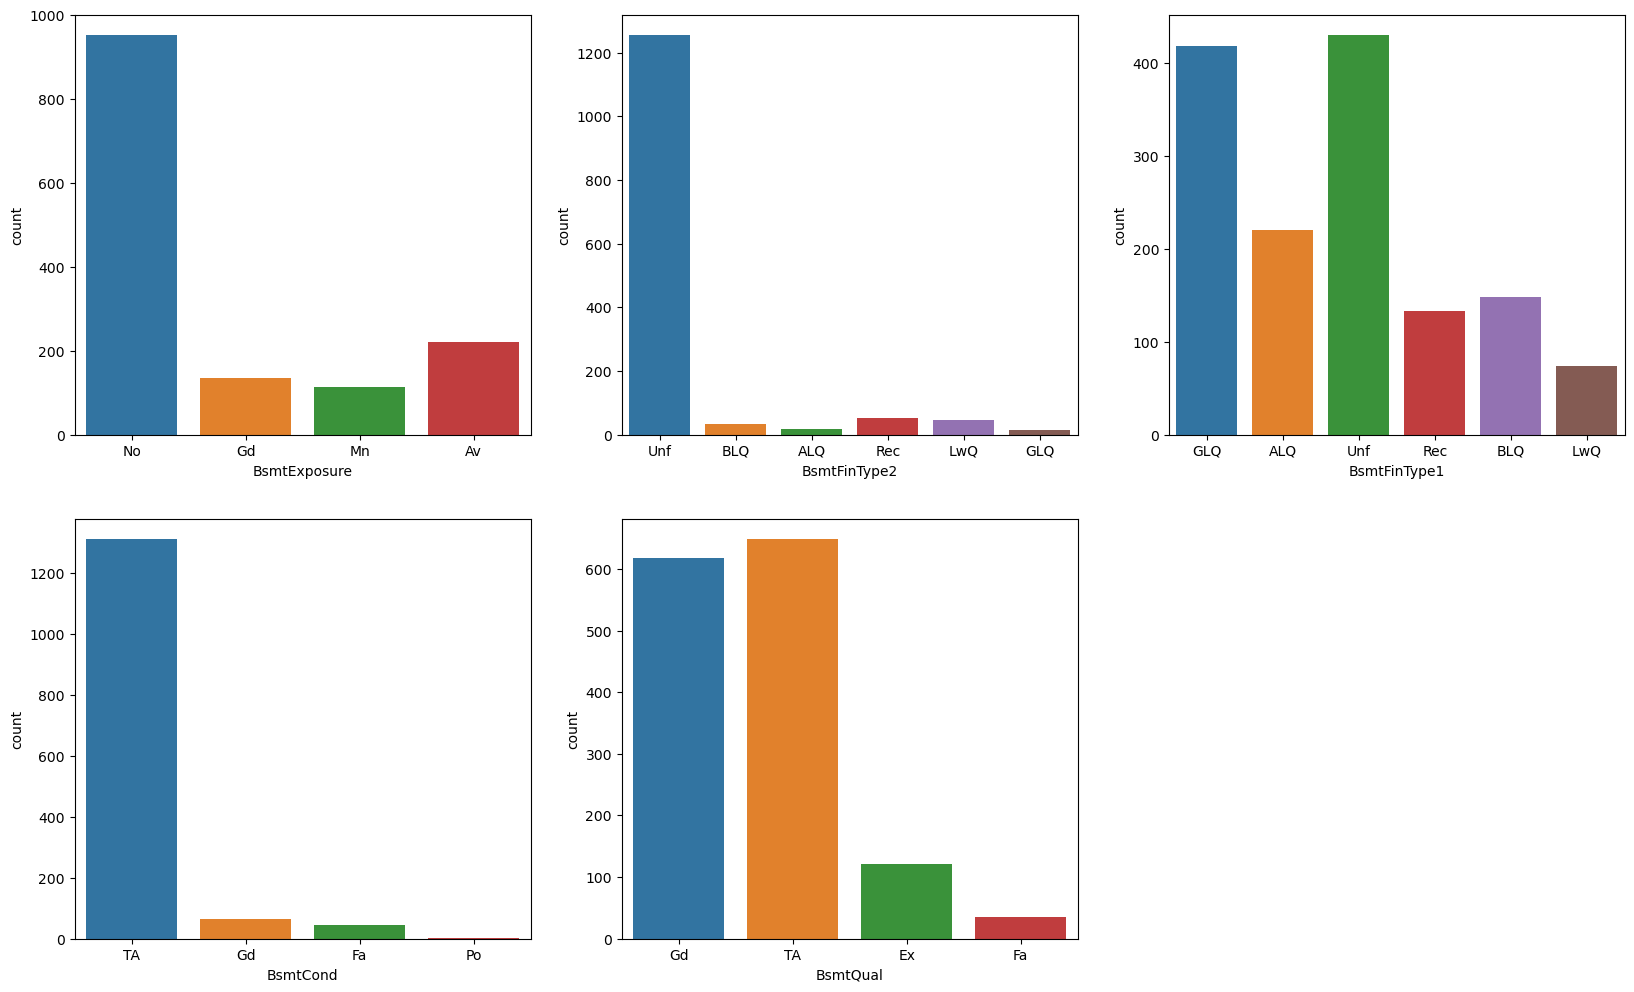

In [14]:

plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.countplot(x = 'BsmtExposure', data = surp_df)

plt.subplot(2,3,2)
sns.countplot(x = 'BsmtFinType2',  data = surp_df)

plt.subplot(2,3,3)
sns.countplot(x = 'BsmtFinType1', data = surp_df)
plt.subplot(2,3,4)
sns.countplot(x = 'BsmtCond', data = surp_df)
plt.subplot(2,3,5)
sns.countplot(x = 'BsmtQual',  data = surp_df)

plt.show()

In [15]:
# Cases when the house doesn't have the basement so replacing null with No Basement

surp_df['BsmtExposure'] = surp_df['BsmtExposure'].replace(np.nan, 'No Basement')
surp_df['BsmtFinType2'] = surp_df['BsmtFinType2'].replace(np.nan, 'No Basement')
surp_df['BsmtFinType1'] = surp_df['BsmtFinType1'].replace(np.nan, 'No Basement')
surp_df['BsmtCond'] = surp_df['BsmtCond'].replace(np.nan, 'No Basement')
surp_df['BsmtQual'] = surp_df['BsmtQual'].replace(np.nan, 'No Basement')

In [16]:
#check missing percentage
percent_missing = (surp_df.isnull().sum() / surp_df.isnull().count()*100).sort_values(ascending = False)
percent_missing.head(-1)


Id               0.0
FullBath         0.0
Fireplaces       0.0
Functional       0.0
TotRmsAbvGrd     0.0
KitchenQual      0.0
KitchenAbvGr     0.0
BedroomAbvGr     0.0
HalfBath         0.0
BsmtHalfBath     0.0
MSSubClass       0.0
BsmtFullBath     0.0
GrLivArea        0.0
LowQualFinSF     0.0
2ndFlrSF         0.0
1stFlrSF         0.0
Electrical       0.0
CentralAir       0.0
GarageType       0.0
GarageYrBlt      0.0
GarageFinish     0.0
GarageCars       0.0
SaleCondition    0.0
SaleType         0.0
YrSold           0.0
MoSold           0.0
MiscVal          0.0
PoolArea         0.0
ScreenPorch      0.0
3SsnPorch        0.0
EnclosedPorch    0.0
OpenPorchSF      0.0
WoodDeckSF       0.0
PavedDrive       0.0
GarageCond       0.0
GarageQual       0.0
GarageArea       0.0
HeatingQC        0.0
Heating          0.0
TotalBsmtSF      0.0
YearBuilt        0.0
OverallQual      0.0
HouseStyle       0.0
BldgType         0.0
Condition2       0.0
Condition1       0.0
Neighborhood     0.0
LandSlope    

In [17]:
#Let's check the dependent variable i.e SalePrice
surp_df['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

<Axes: xlabel='SalePrice', ylabel='Density'>

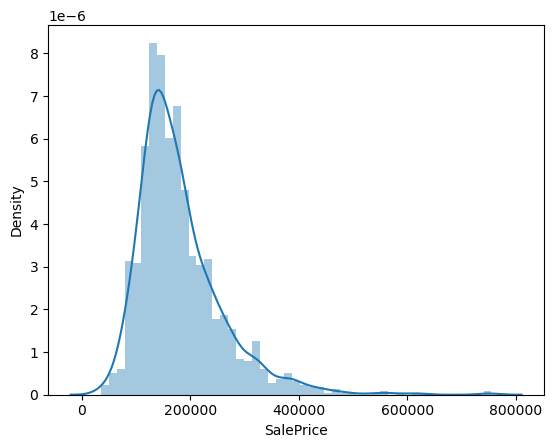

In [18]:
sns.distplot(surp_df['SalePrice']) #it's skewed 

In [19]:
#skewness and kurtosis
print("Skewness: %f" % surp_df['SalePrice'].skew())

Skewness: 1.882876


In [20]:
surp_df['SalePrice']=np.log(surp_df.SalePrice) #tranforming to form normal disribution


In [21]:
surp_df['SalePrice'].describe()

count    1460.000000
mean       12.024051
std         0.399452
min        10.460242
25%        11.775097
50%        12.001505
75%        12.273731
max        13.534473
Name: SalePrice, dtype: float64

<Axes: xlabel='SalePrice', ylabel='Density'>

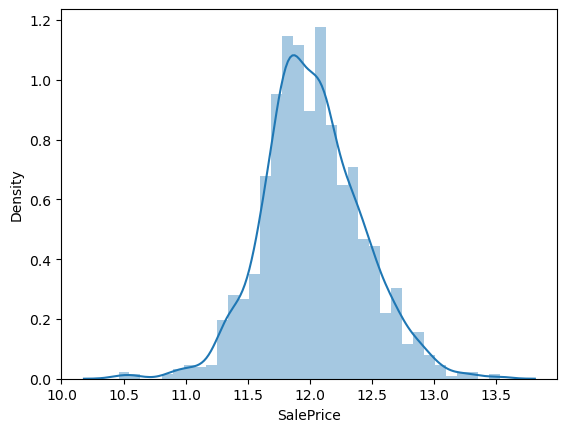

In [22]:
sns.distplot(surp_df['SalePrice']) # Normally distributed now

In [23]:
#skewness 
print("Skewness: %f" % surp_df['SalePrice'].skew())

Skewness: 0.121335


### Now the dependent variable SalePrice is normally distributed.

### Check all the Categorical columns


In [24]:
Cat = surp_df.select_dtypes(include=['object'])
Cat.columns

Index(['MSSubClass', 'MSZoning', 'Street', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'GarageType',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType',
       'SaleCondition'],
      dtype='object')

In [25]:
# as we have many columns so let's make groups randomly and visualize them

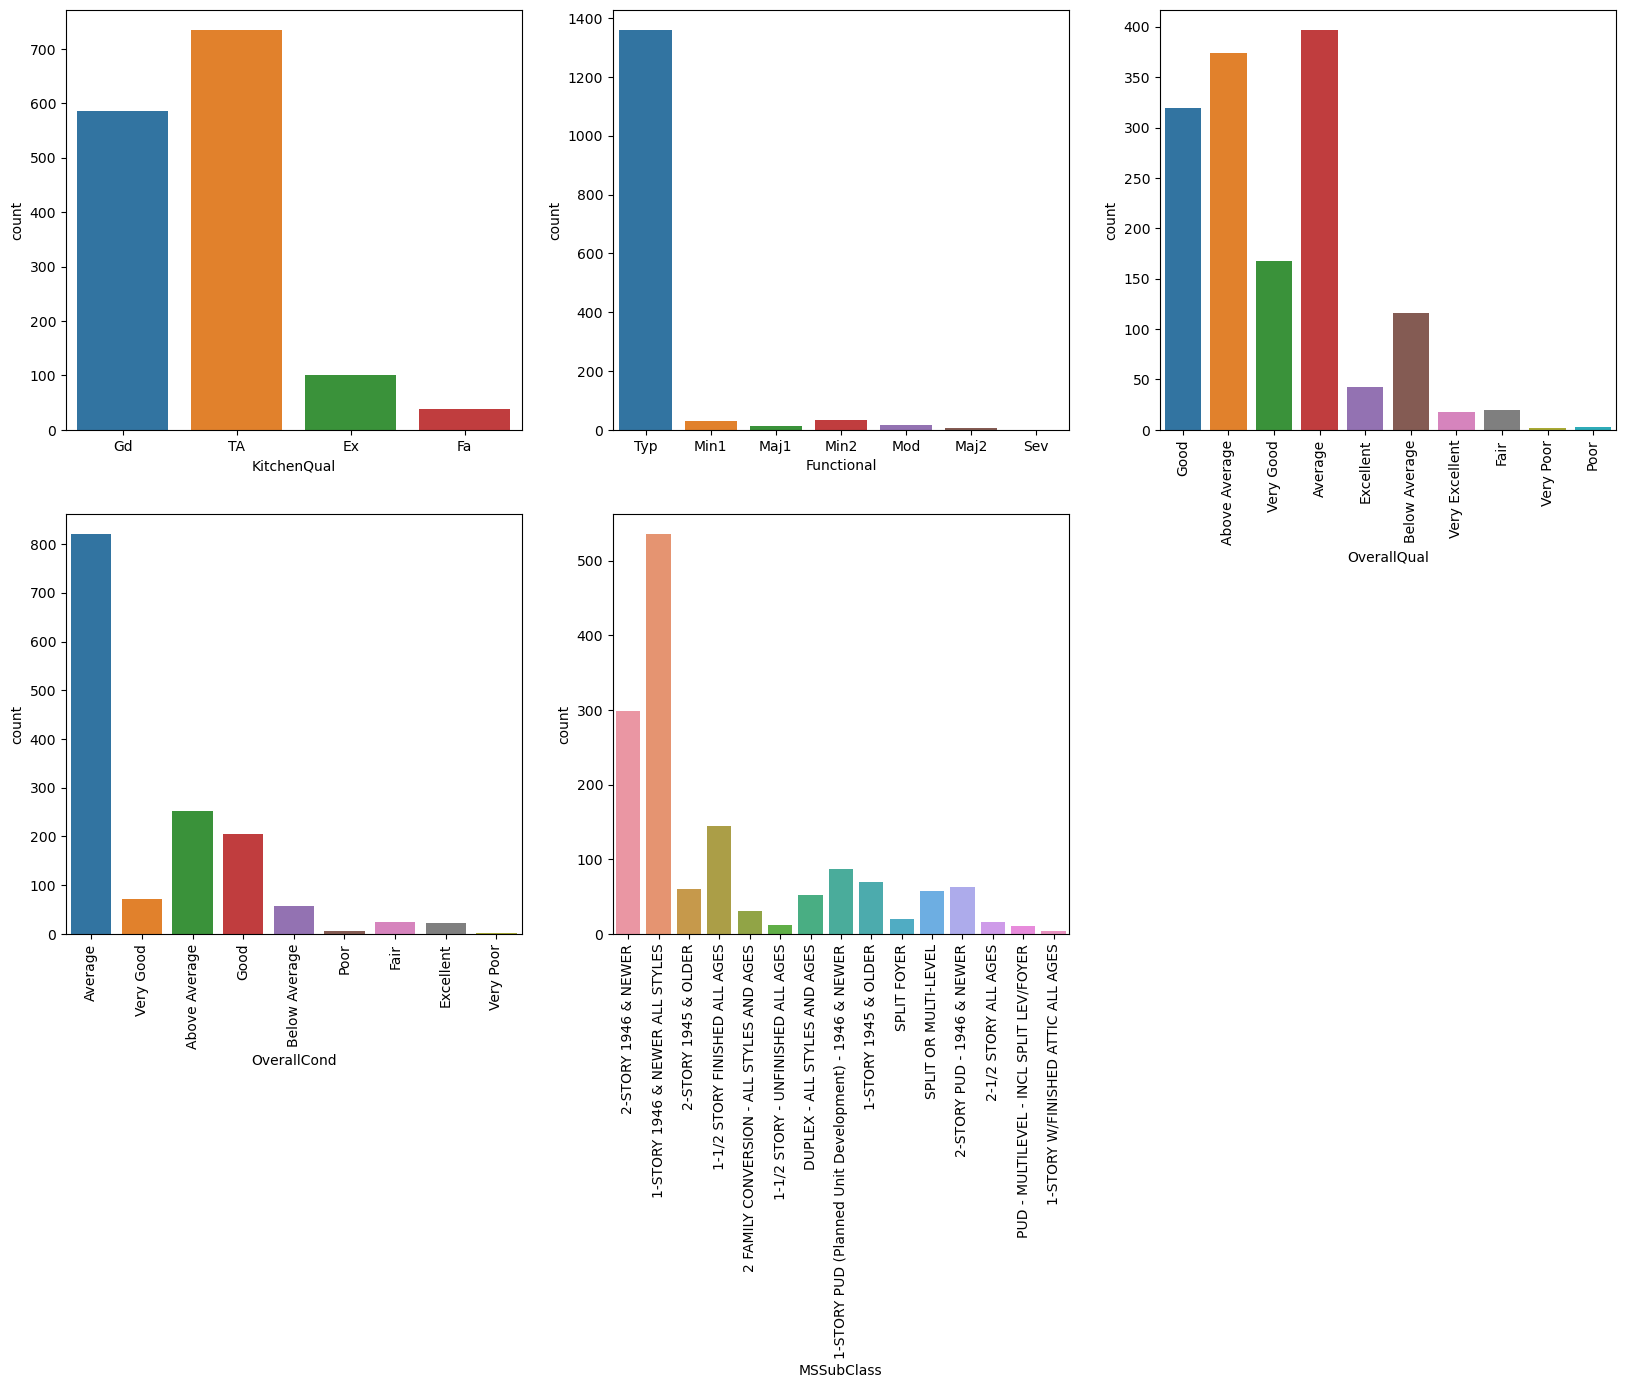

In [26]:

plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.countplot(x = 'KitchenQual',  data = surp_df)
plt.subplot(2,3,2)
sns.countplot(x = 'Functional', data = surp_df)
plt.subplot(2,3,3)
sns.countplot(x = 'OverallQual', data = surp_df)
plt.xticks(rotation=90)
plt.subplot(2,3,4)
sns.countplot(x = 'OverallCond', data = surp_df)
plt.xticks(rotation=90)

plt.subplot(2,3,5)
sns.countplot(x = 'MSSubClass',  data = surp_df)
plt.xticks(rotation=90)


plt.show()

In [27]:
surp_df['MSSubClass'].value_counts() # checking other columns for skewness

MSSubClass
1-STORY 1946 & NEWER ALL STYLES                          536
2-STORY 1946 & NEWER                                     299
1-1/2 STORY FINISHED ALL AGES                            144
1-STORY PUD (Planned Unit Development) - 1946 & NEWER     87
1-STORY 1945 & OLDER                                      69
2-STORY PUD - 1946 & NEWER                                63
2-STORY 1945 & OLDER                                      60
SPLIT OR MULTI-LEVEL                                      58
DUPLEX - ALL STYLES AND AGES                              52
2 FAMILY CONVERSION - ALL STYLES AND AGES                 30
SPLIT FOYER                                               20
2-1/2 STORY ALL AGES                                      16
1-1/2 STORY - UNFINISHED ALL AGES                         12
PUD - MULTILEVEL - INCL SPLIT LEV/FOYER                   10
1-STORY W/FINISHED ATTIC ALL AGES                          4
Name: count, dtype: int64

In [28]:
# Dropping highly skewed column 
surp_df.drop(['Functional'],axis=1,inplace=True)


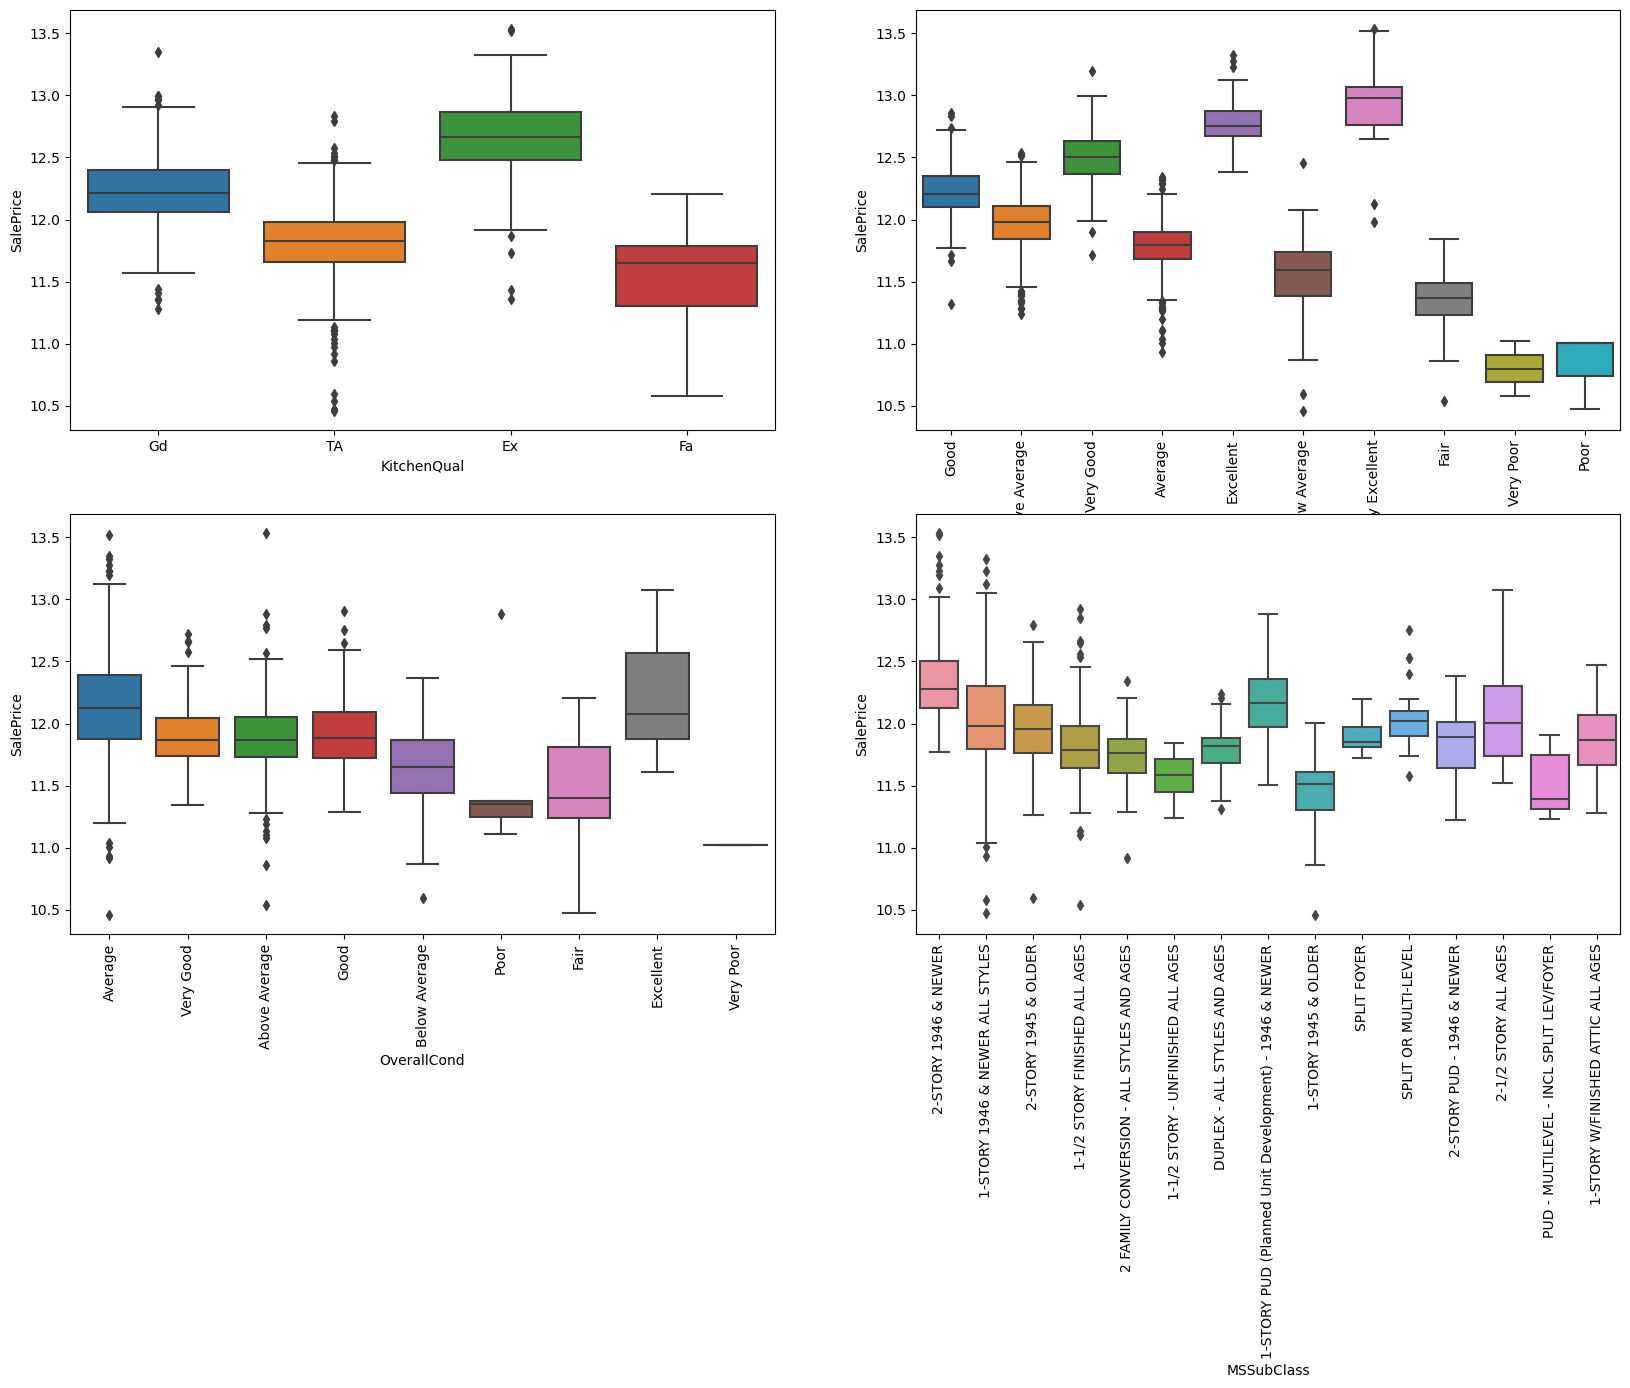

In [29]:
plt.figure(figsize=(20, 12))
plt.subplot(2,2,1)
sns.boxplot(x ='KitchenQual', y ='SalePrice', data = surp_df)
plt.subplot(2,2,2)
sns.boxplot(x = 'OverallQual', y = 'SalePrice', data = surp_df)
plt.xticks(rotation=90)

plt.subplot(2,2,3)
sns.boxplot(x = 'OverallCond', y = 'SalePrice', data = surp_df)
plt.xticks(rotation=90)

plt.subplot(2,2,4)
sns.boxplot(x = 'MSSubClass', y = 'SalePrice', data = surp_df)
plt.xticks(rotation=90)

plt.show()

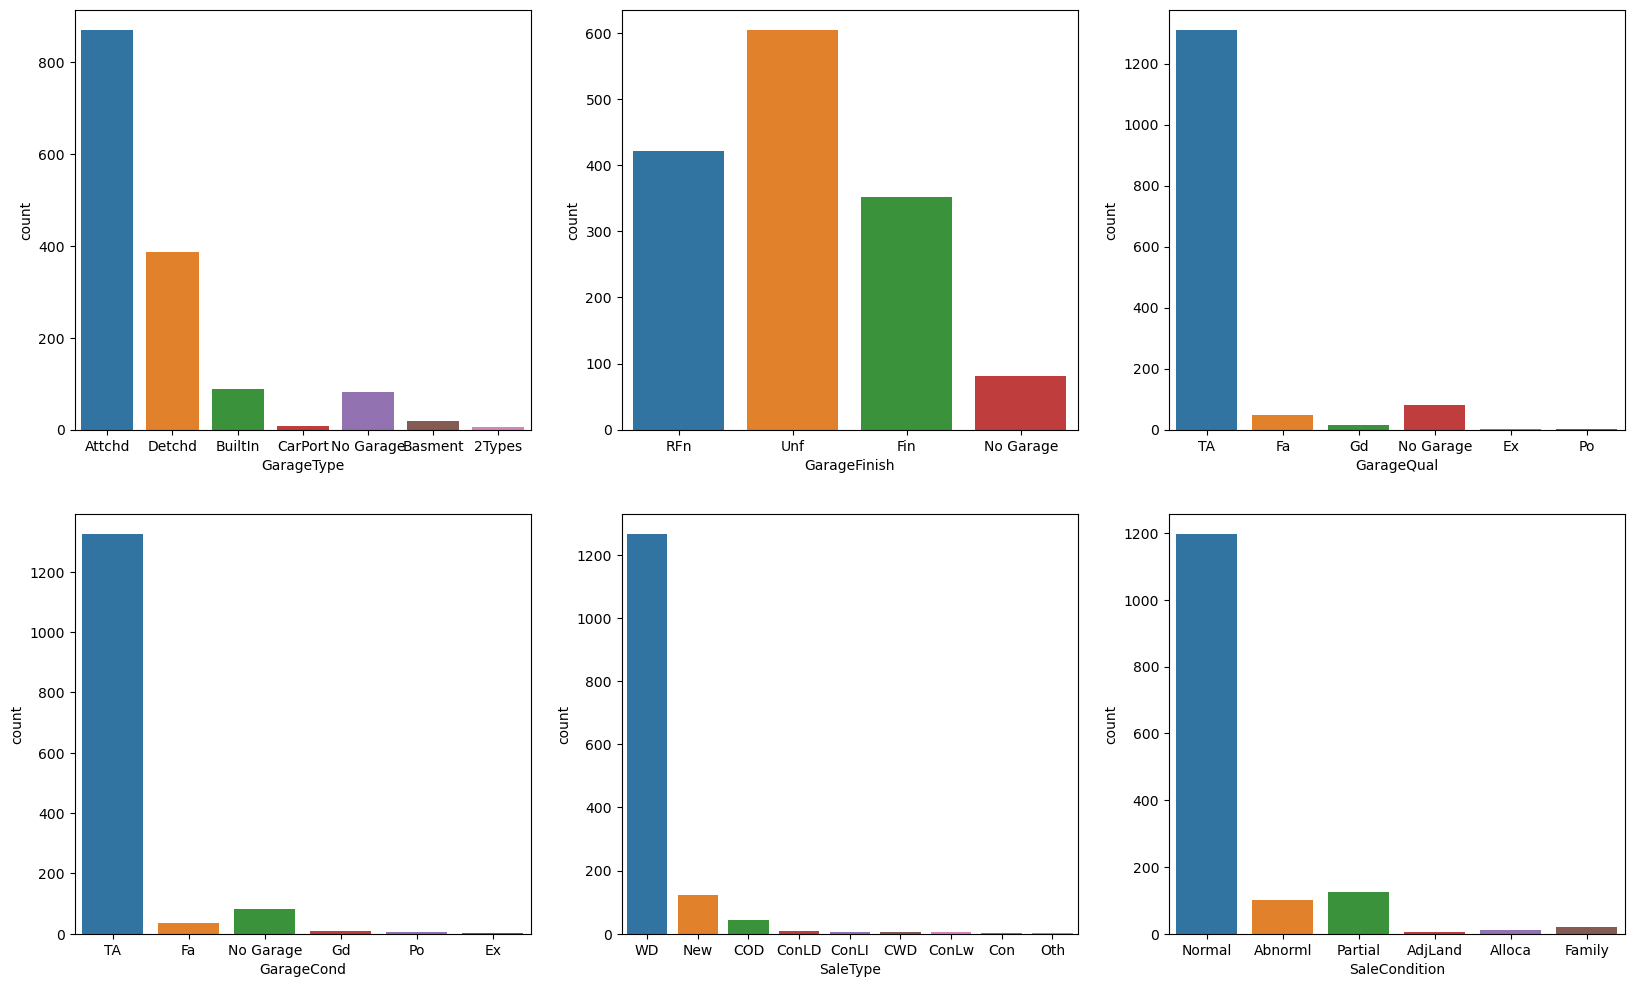

In [30]:


plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.countplot(x = 'GarageType',  data = surp_df)
plt.subplot(2,3,2)
sns.countplot(x = 'GarageFinish', data = surp_df)
plt.subplot(2,3,3)
sns.countplot(x = 'GarageQual', data = surp_df)
plt.subplot(2,3,4)
sns.countplot(x = 'GarageCond', data = surp_df)
plt.subplot(2,3,5)
sns.countplot(x = 'SaleType',  data = surp_df)
plt.subplot(2,3,6)
sns.countplot(x = 'SaleCondition', data = surp_df)
plt.show()

In [31]:
surp_df['SaleCondition'].value_counts() #checking other columns for skewness

SaleCondition
Normal     1198
Partial     125
Abnorml     101
Family       20
Alloca       12
AdjLand       4
Name: count, dtype: int64

In [32]:
surp_df['GarageType'] = surp_df['GarageType'].replace(['Basment','CarPort','2Types'],'Others')
surp_df['SaleCondition'] = surp_df['SaleCondition'].replace(['Family','Alloca','AdjLand'],'Others')


# Dropping highly skewed columns
surp_df.drop(['GarageQual','GarageCond','SaleType'],axis=1,inplace=True)


<Axes: xlabel='GarageFinish', ylabel='SalePrice'>

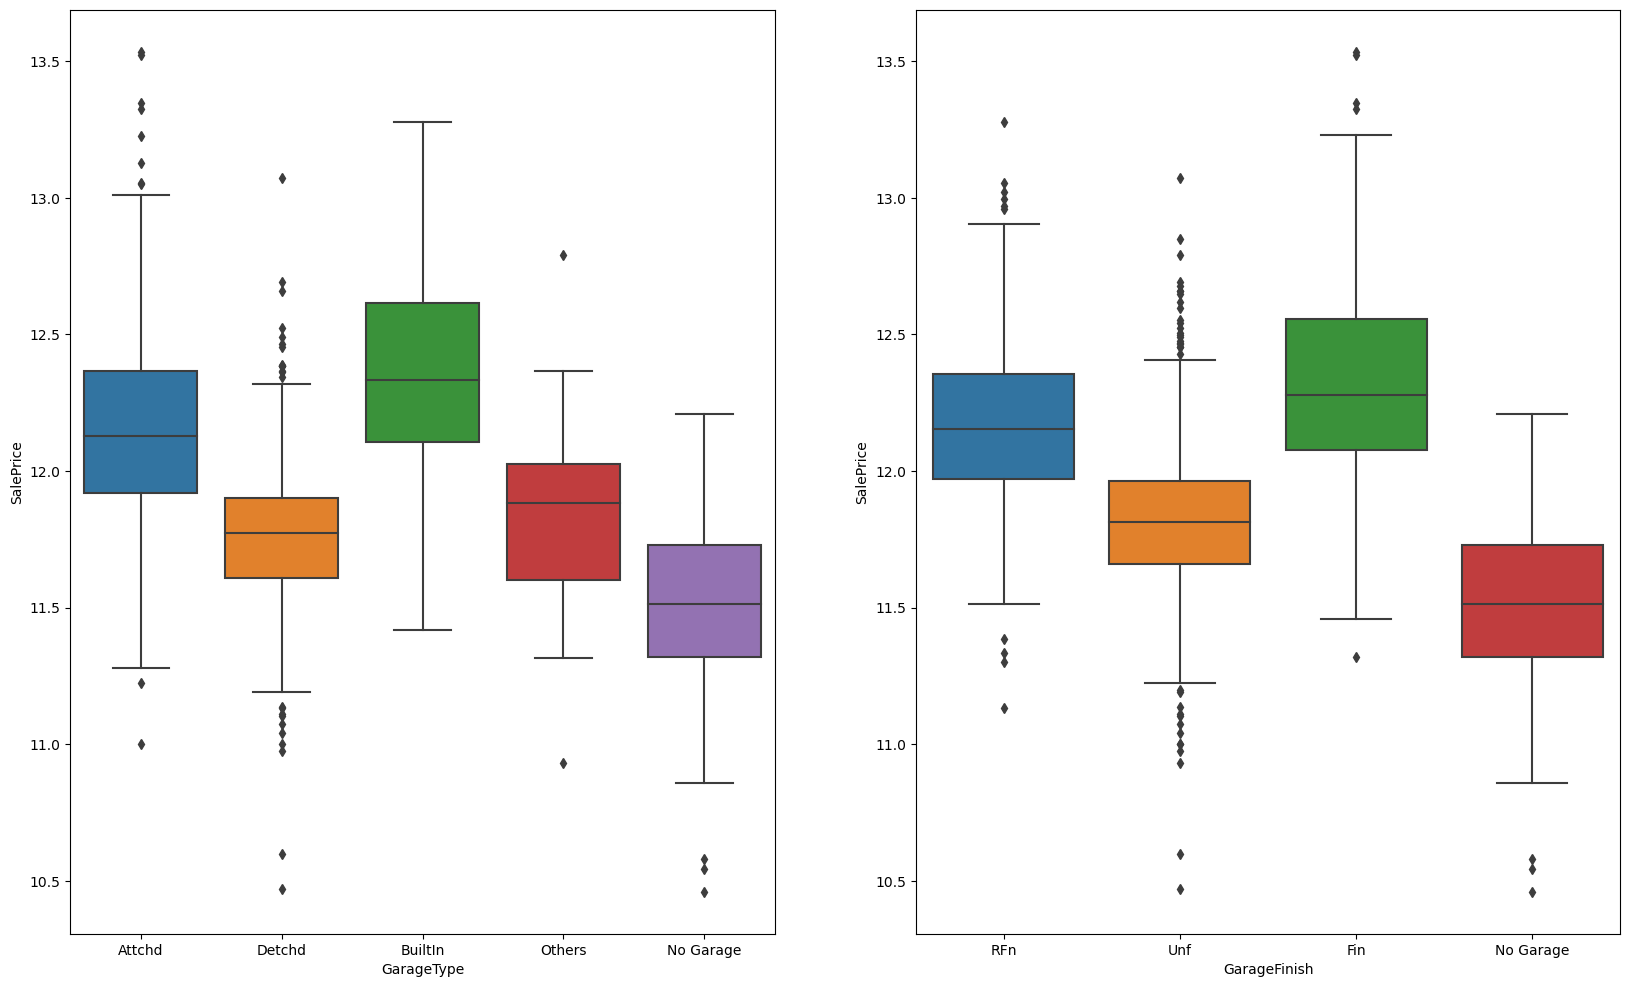

In [33]:
#Let's see the effect of Garage type and GarageFinish on SalePrice

plt.figure(figsize=(20, 12))
plt.subplot(1,2,1)
sns.boxplot(x = 'GarageType', y ='SalePrice', data = surp_df)
plt.subplot(1,2,2)
sns.boxplot(x = 'GarageFinish', y = 'SalePrice', data = surp_df)


- Price of Builtin Garagetype and Finished garage is the highest


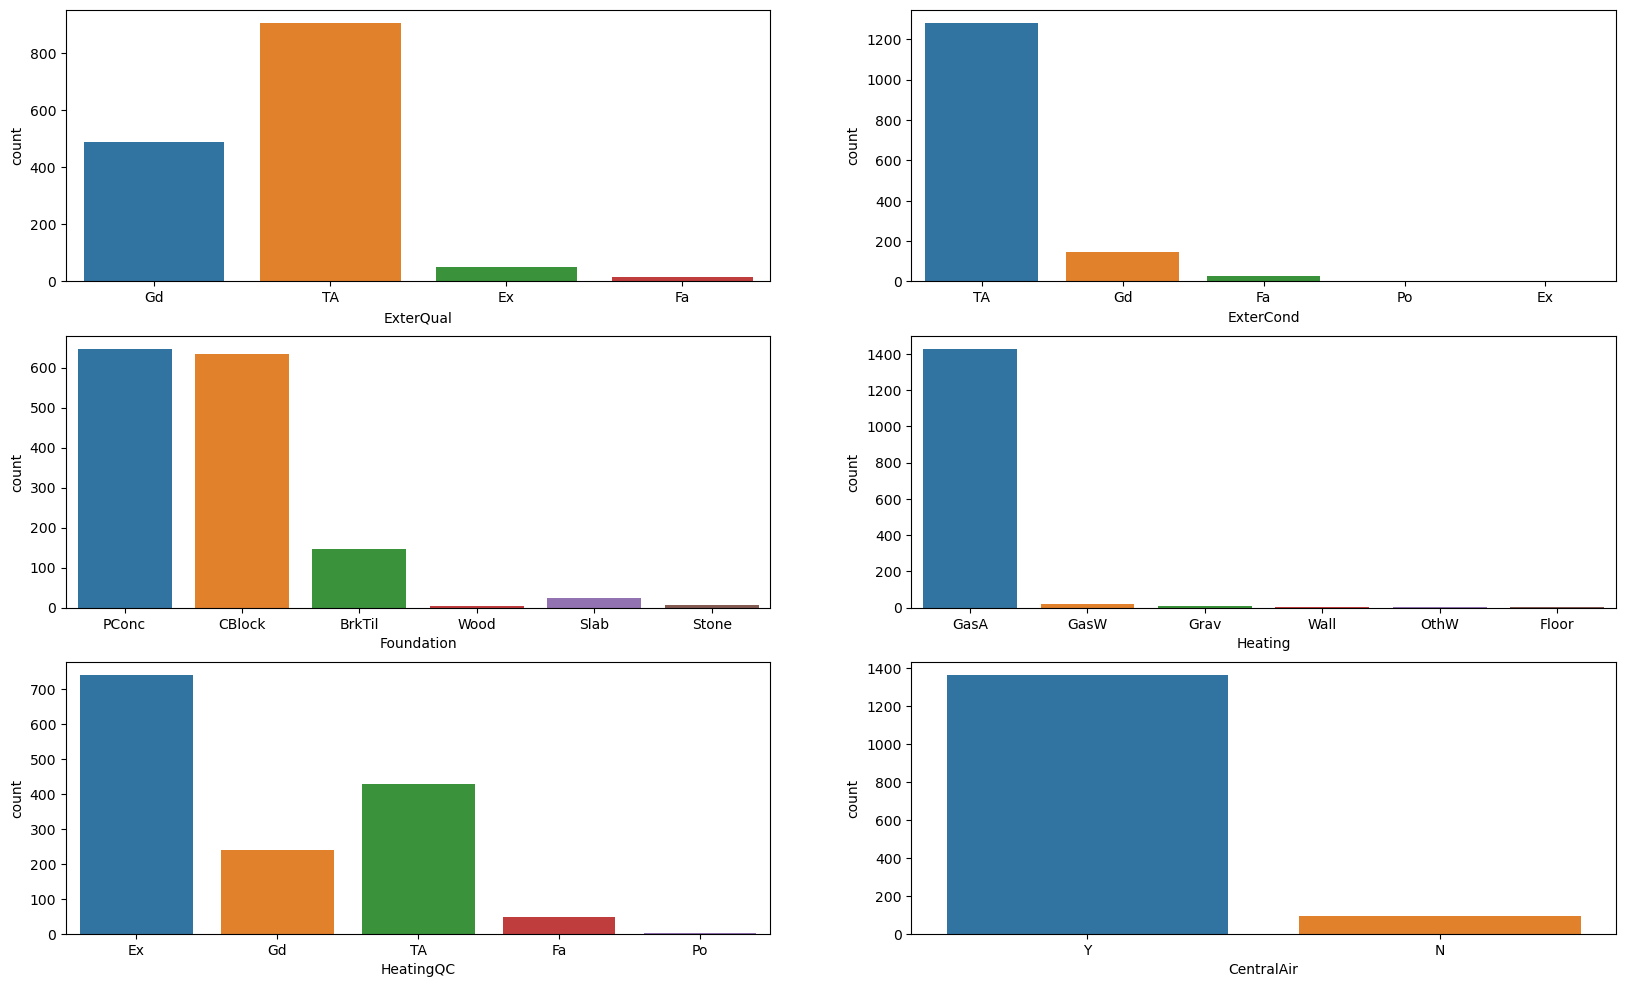

In [34]:
plt.figure(figsize=(20, 12))
plt.subplot(3,2,1)
sns.countplot(x = 'ExterQual',  data = surp_df)
plt.subplot(3,2,2)
sns.countplot(x = 'ExterCond', data = surp_df)
plt.subplot(3,2,3)
sns.countplot(x = 'Foundation', data = surp_df)
plt.subplot(3,2,4)
sns.countplot(x = 'Heating', data = surp_df)
plt.subplot(3,2,5)
sns.countplot(x = 'HeatingQC',  data = surp_df)
plt.subplot(3,2,6)
sns.countplot(x = 'CentralAir', data = surp_df)
plt.show()

- Variables like Heating , Central Airand Exter Cond are skewed so would be dropping these variables

In [35]:
surp_df['HeatingQC'].value_counts()

HeatingQC
Ex    741
TA    428
Gd    241
Fa     49
Po      1
Name: count, dtype: int64

In [36]:
surp_df['Foundation'] = surp_df['Foundation'].replace(['Slab','Stone','Wood'],'Others')


# Dropping highly skewed column 
surp_df.drop(['CentralAir','Heating','ExterCond'],axis=1,inplace=True)


<Axes: xlabel='HeatingQC', ylabel='SalePrice'>

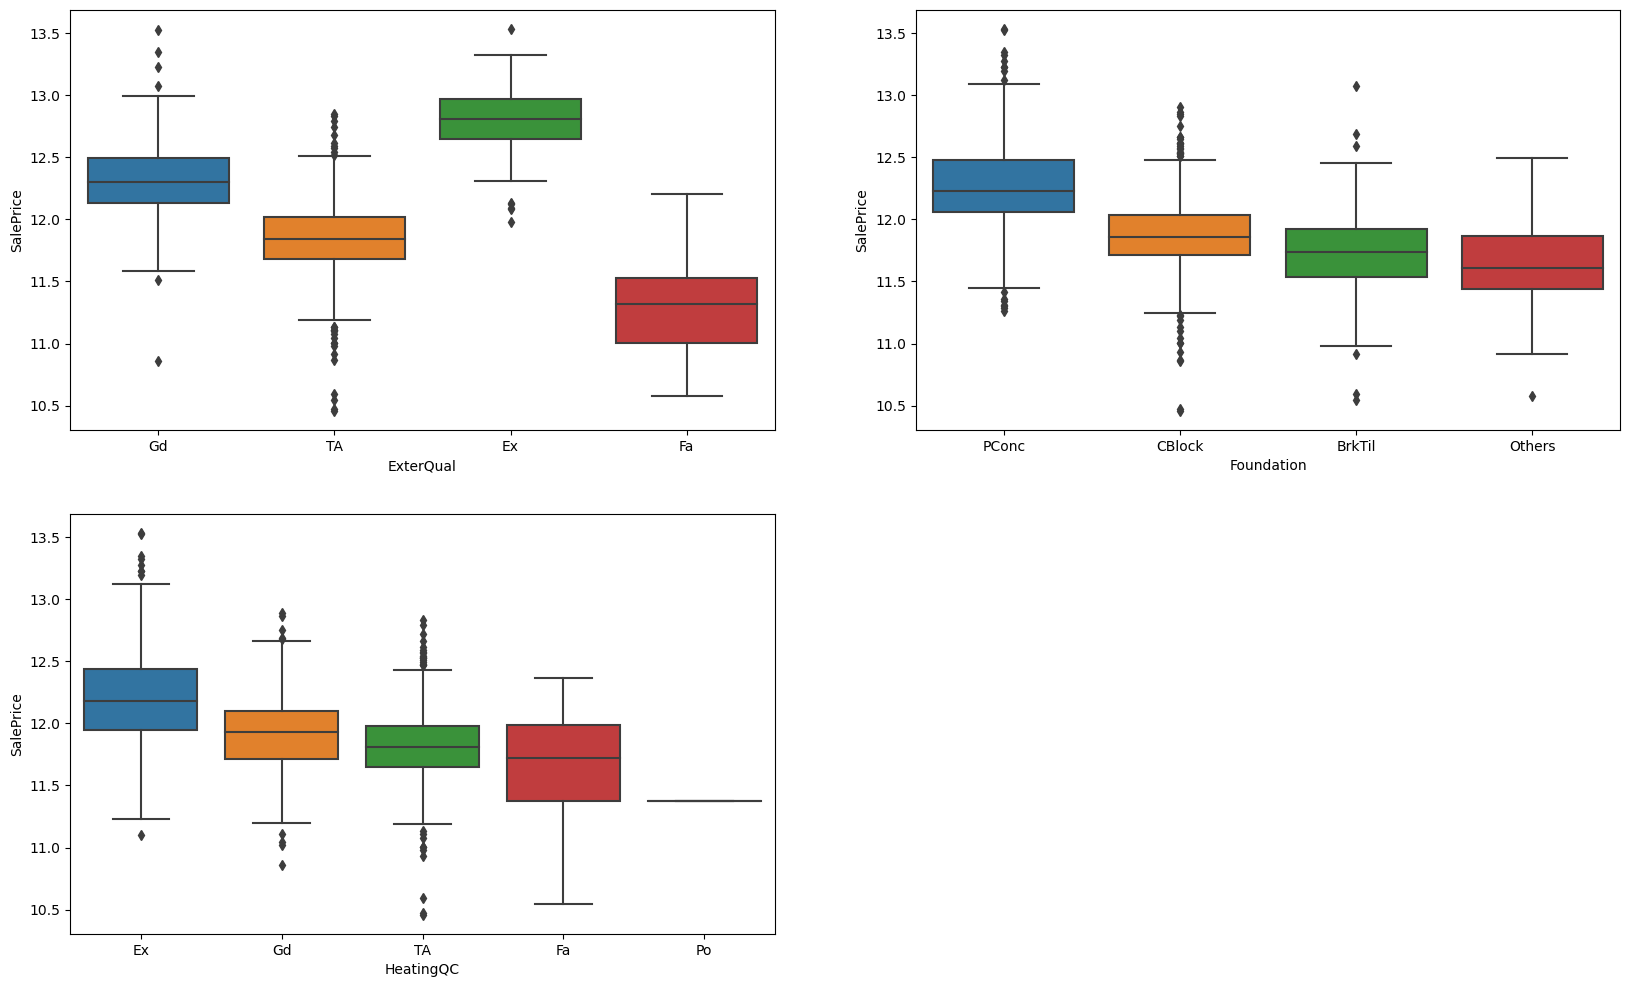

In [37]:
#Let's see effect of Garage type and GarageFinish on SalePrice

plt.figure(figsize=(20, 12))
plt.subplot(2,2,1)
sns.boxplot(x = 'ExterQual', y ='SalePrice', data = surp_df)
plt.subplot(2,2,2)
sns.boxplot(x = 'Foundation', y = 'SalePrice', data = surp_df)
plt.subplot(2,2,3)
sns.boxplot(x = 'HeatingQC', y = 'SalePrice', data = surp_df)

- Price of Excellent ExterQual and HeatingQc is highest
- Price of Poured Contrete Foundation is highest.

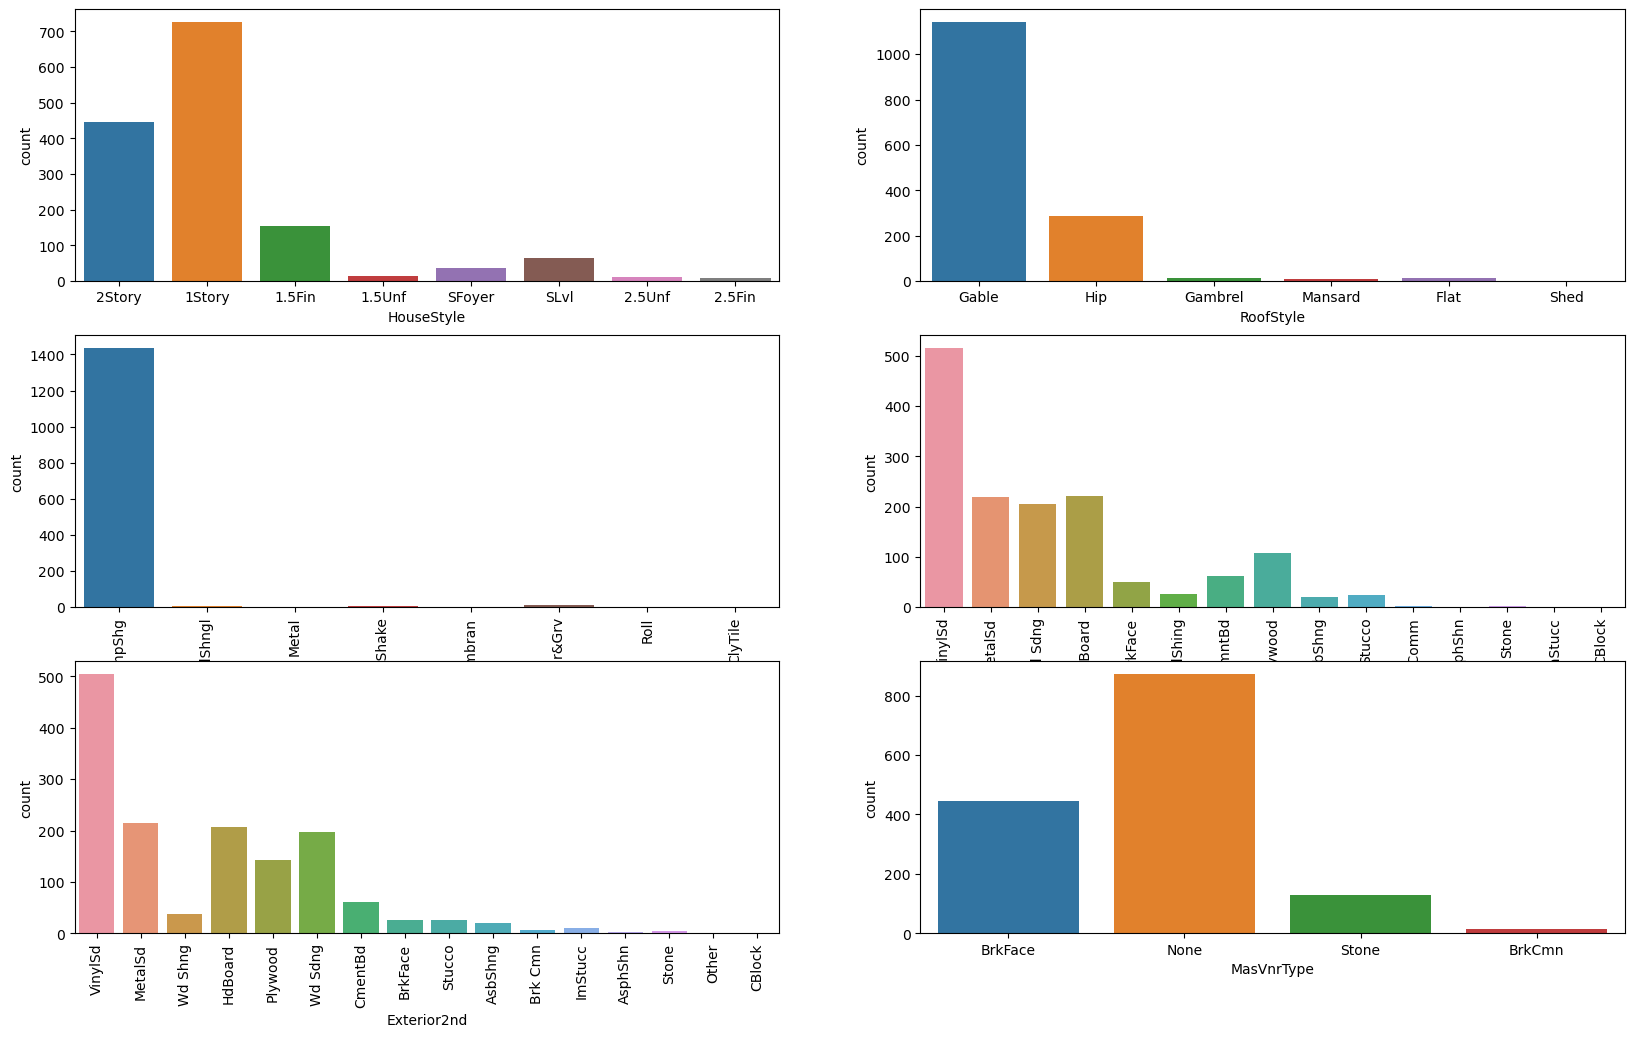

In [38]:
plt.figure(figsize=(20, 12))
plt.subplot(3,2,1)
sns.countplot(x = 'HouseStyle',  data = surp_df)
plt.subplot(3,2,2)
sns.countplot(x = 'RoofStyle', data = surp_df)
plt.subplot(3,2,3)
sns.countplot(x = 'RoofMatl', data = surp_df)
plt.xticks(rotation=90)
plt.subplot(3,2,4)
sns.countplot(x = 'Exterior1st', data = surp_df)
plt.xticks(rotation=90)
plt.subplot(3,2,5)
sns.countplot(x = 'Exterior2nd',  data = surp_df)
plt.xticks(rotation=90)
plt.subplot(3,2,6)
sns.countplot(x = 'MasVnrType', data = surp_df)
plt.show()

In [39]:
surp_df['Exterior2nd'].value_counts() # checking the skewness for other columns

Exterior2nd
VinylSd    504
MetalSd    214
HdBoard    207
Wd Sdng    197
Plywood    142
CmentBd     60
Wd Shng     38
Stucco      26
BrkFace     25
AsbShng     20
ImStucc     10
Brk Cmn      7
Stone        5
AsphShn      3
Other        1
CBlock       1
Name: count, dtype: int64

In [40]:
surp_df['HouseStyle'] = surp_df['HouseStyle'].replace(['SFoyer','1.5Unf','2.5Unf','2.5Fin'],'Others')
surp_df['RoofStyle'] = surp_df['RoofStyle'].replace(['Shed','Mansard','Gambrel','Flat'],'Others')
surp_df['Exterior1st'] = surp_df['Exterior1st'].replace(['AsphShn','ImStucc','CBlock','Stone','BrkComm','AsbShng','Stucco','WdShing'],'Others')
surp_df['Exterior2nd'] = surp_df['Exterior2nd'].replace(['Other','AsphShn','ImStucc','CBlock','Stone','BrkComm','AsbShng','Stucco','BrkFace'],'Others')

# Dropping highly skewed column 
surp_df.drop(['RoofMatl'],axis=1,inplace=True)

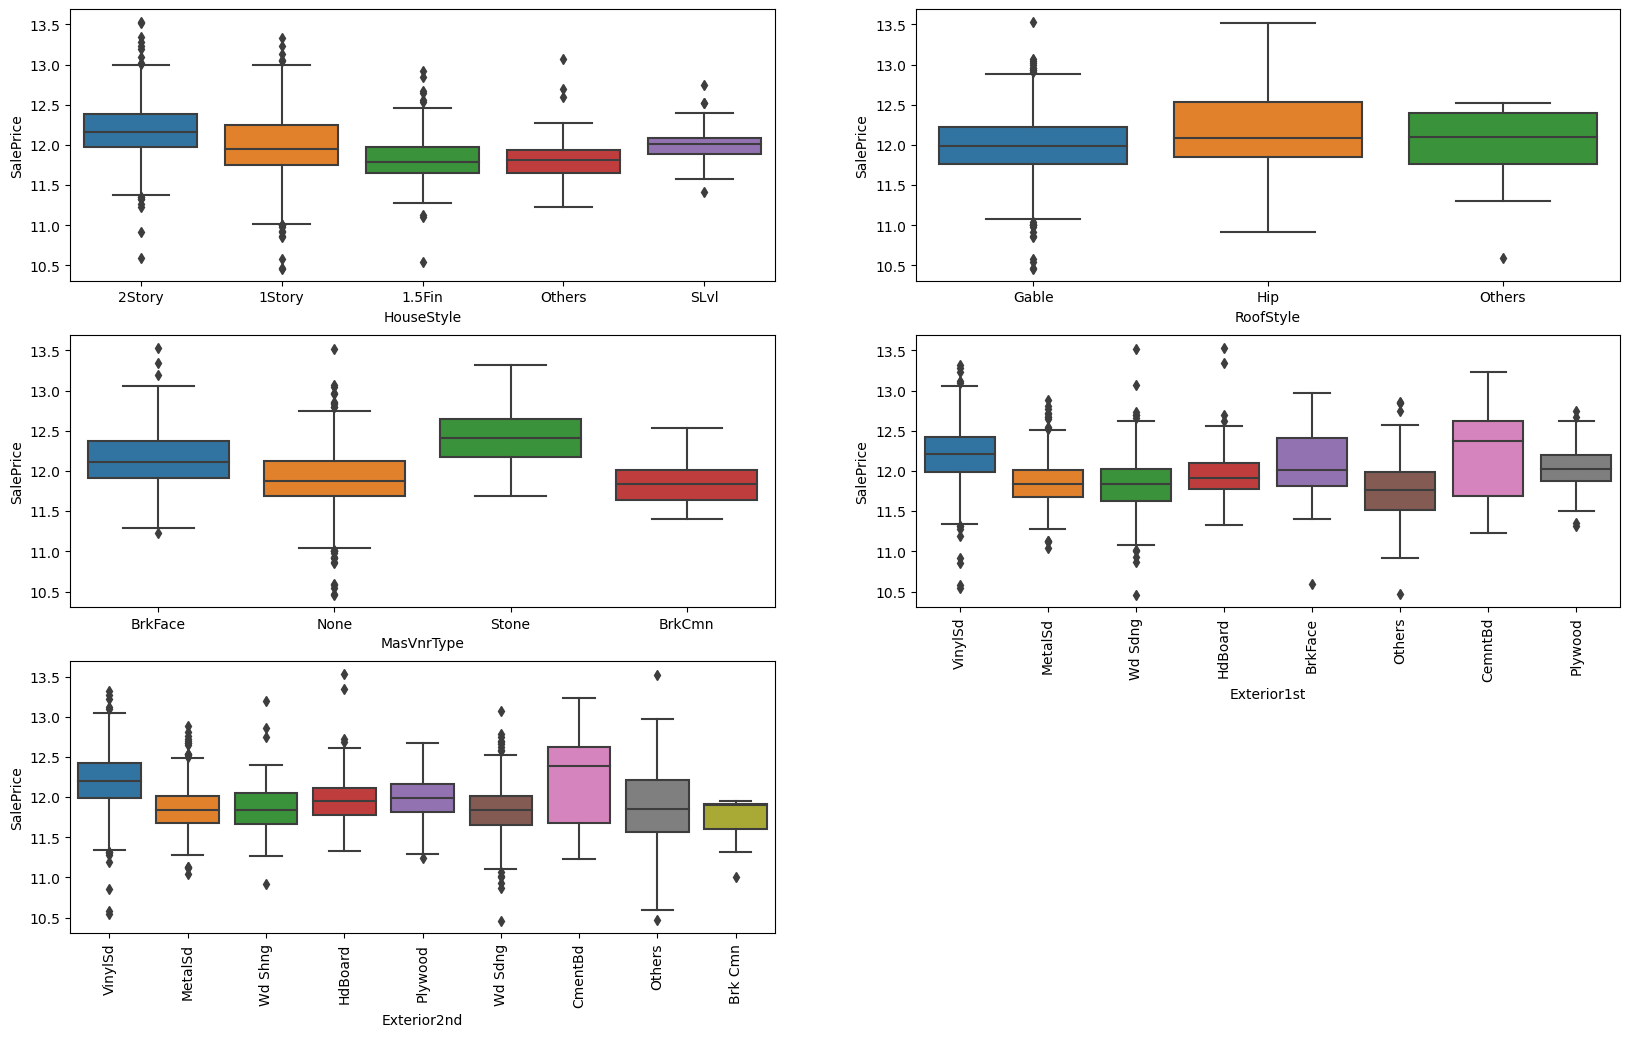

In [41]:
plt.figure(figsize=(20, 12))
plt.subplot(3,2,1)
sns.boxplot(x = 'HouseStyle', y ='SalePrice', data = surp_df)
plt.subplot(3,2,2)
sns.boxplot(x = 'RoofStyle', y = 'SalePrice', data = surp_df)
plt.subplot(3,2,3)
sns.boxplot(x = 'MasVnrType', y = 'SalePrice', data = surp_df)
plt.subplot(3,2,4)
sns.boxplot(x = 'Exterior1st', y = 'SalePrice', data = surp_df)
plt.xticks(rotation=90)
plt.subplot(3,2,5)
sns.boxplot(x = 'Exterior2nd', y = 'SalePrice', data = surp_df)
plt.xticks(rotation=90)
plt.show()

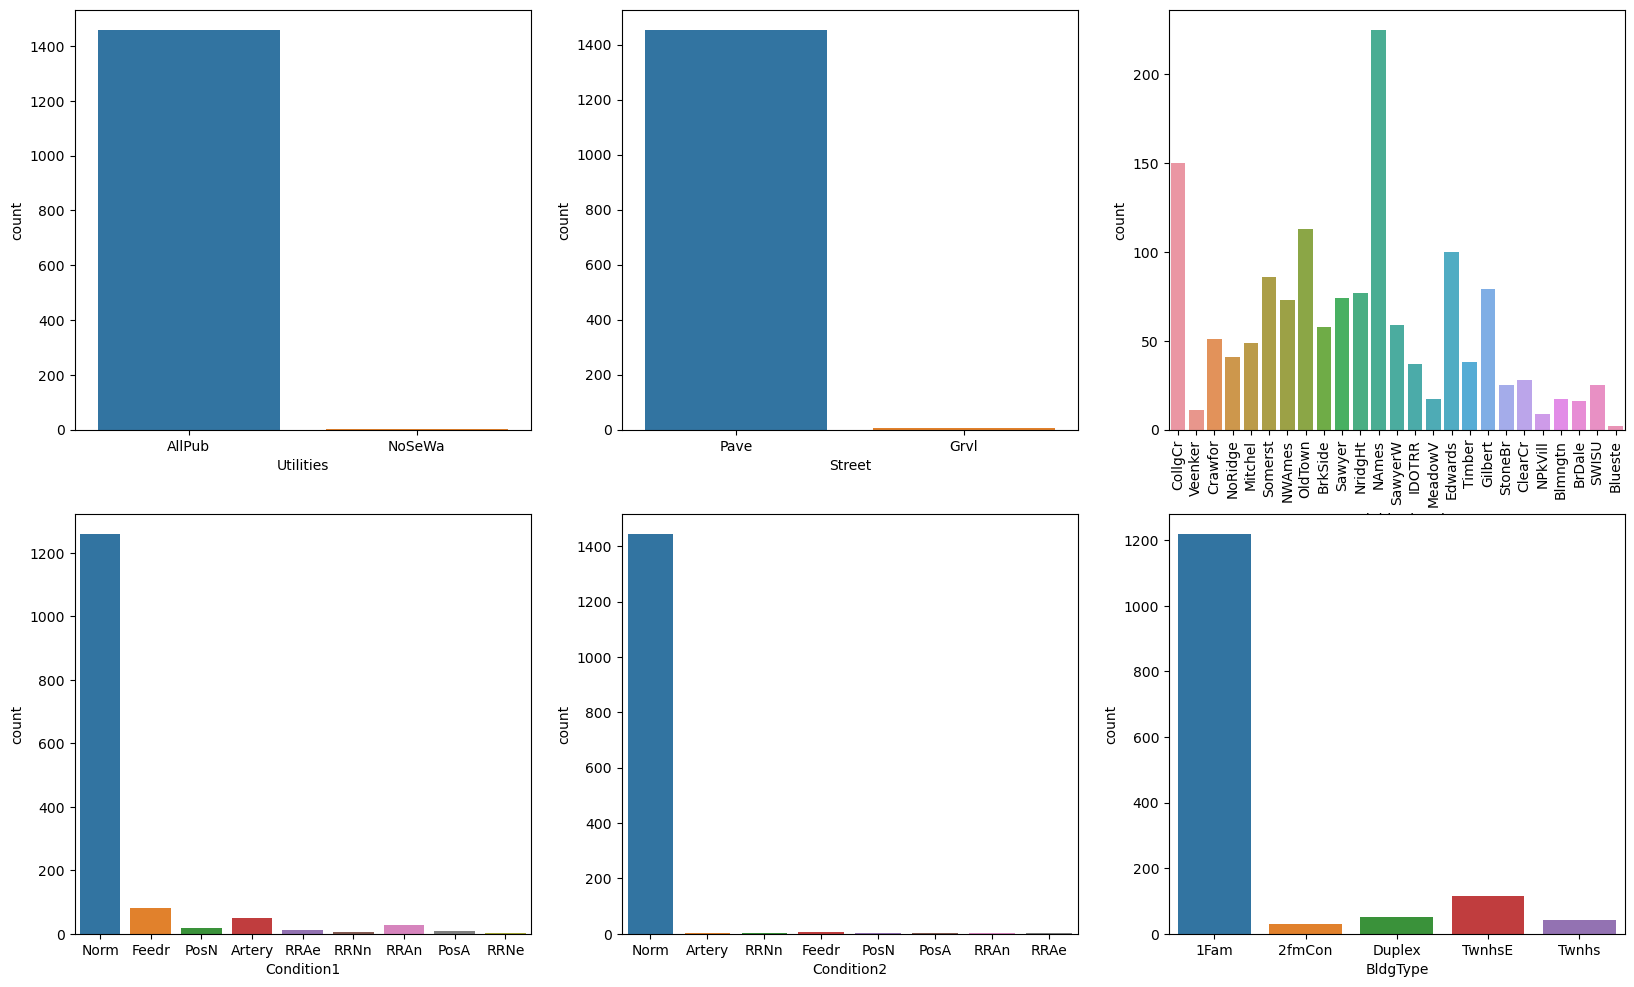

In [42]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.countplot(x = 'Utilities',  data = surp_df)
plt.subplot(2,3,2)
sns.countplot(x = 'Street', data = surp_df)
plt.subplot(2,3,3)
sns.countplot(x = 'Neighborhood', data = surp_df)
plt.xticks(rotation=90)
plt.subplot(2,3,4)
sns.countplot(x = 'Condition1', data = surp_df)
plt.subplot(2,3,5)
sns.countplot(x = 'Condition2',  data = surp_df)
plt.subplot(2,3,6)
sns.countplot(x = 'BldgType', data = surp_df)
plt.show()

In [43]:
surp_df['BldgType'].value_counts()#similarly checking skewness for other columns

BldgType
1Fam      1220
TwnhsE     114
Duplex      52
Twnhs       43
2fmCon      31
Name: count, dtype: int64

In [44]:

# Dropping highly skewed column 
surp_df.drop(['Utilities','Street','Condition1','Condition2'],axis=1,inplace=True)


<Axes: xlabel='BldgType', ylabel='SalePrice'>

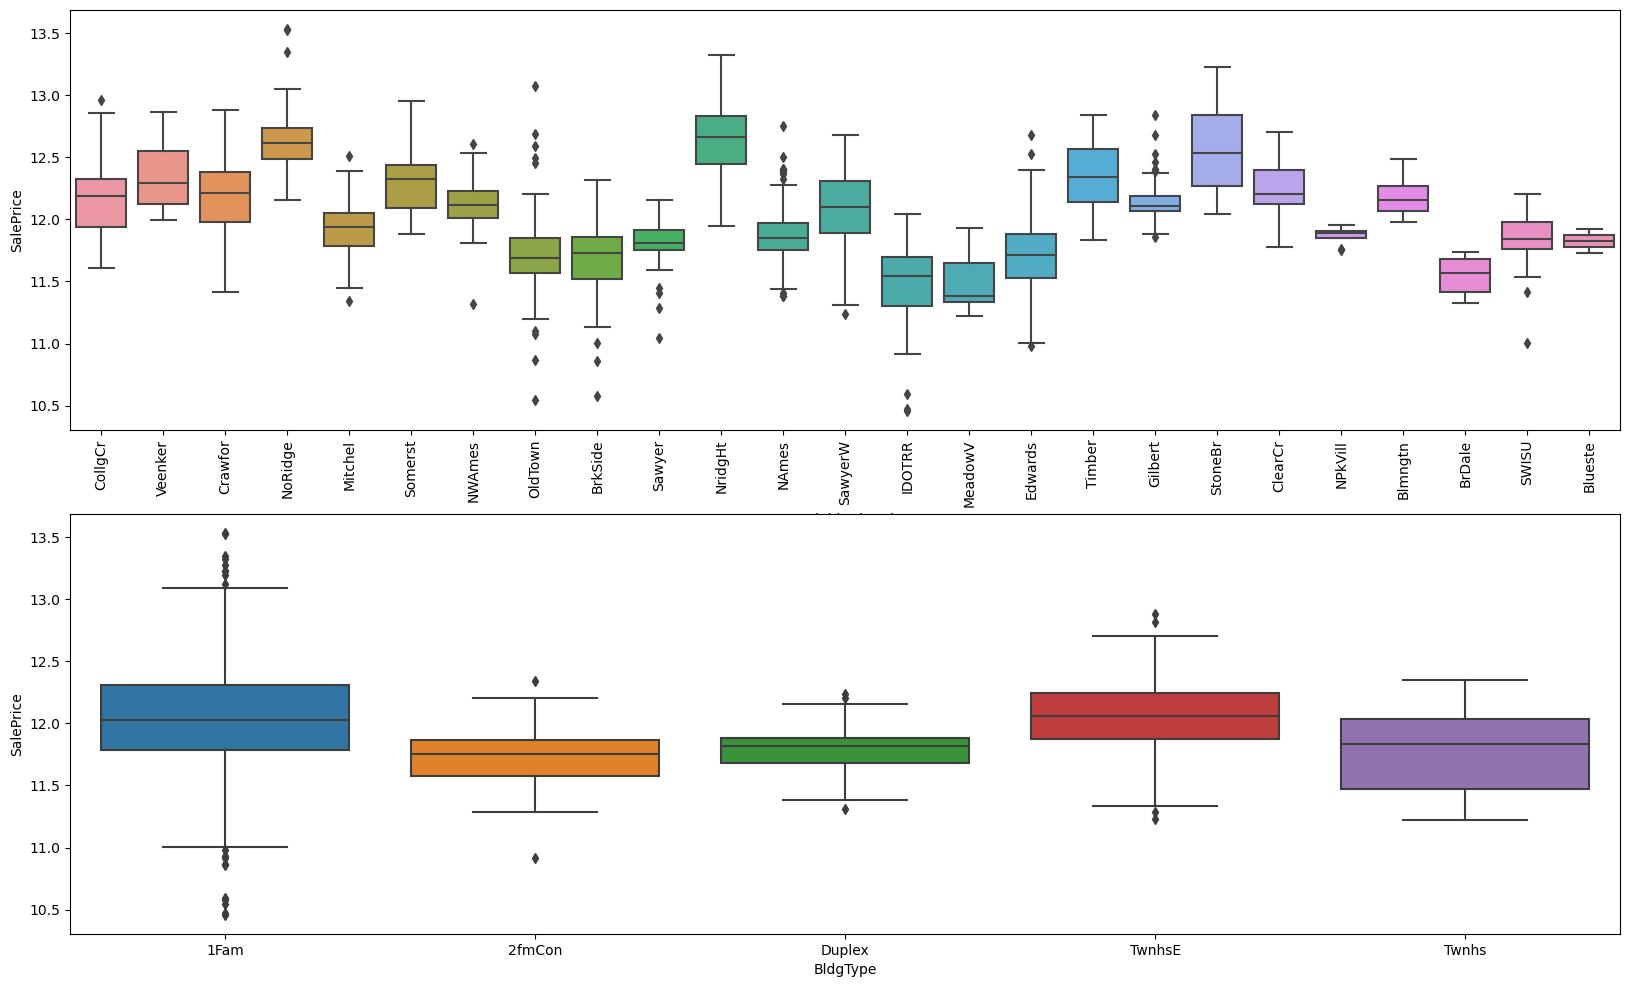

In [45]:
plt.figure(figsize=(20, 12))
plt.subplot(2,1,1)
sns.boxplot(x = 'Neighborhood', y ='SalePrice', data = surp_df)
plt.xticks(rotation=90)
plt.subplot(2,1,2)
sns.boxplot(x = 'BldgType', y = 'SalePrice', data = surp_df)


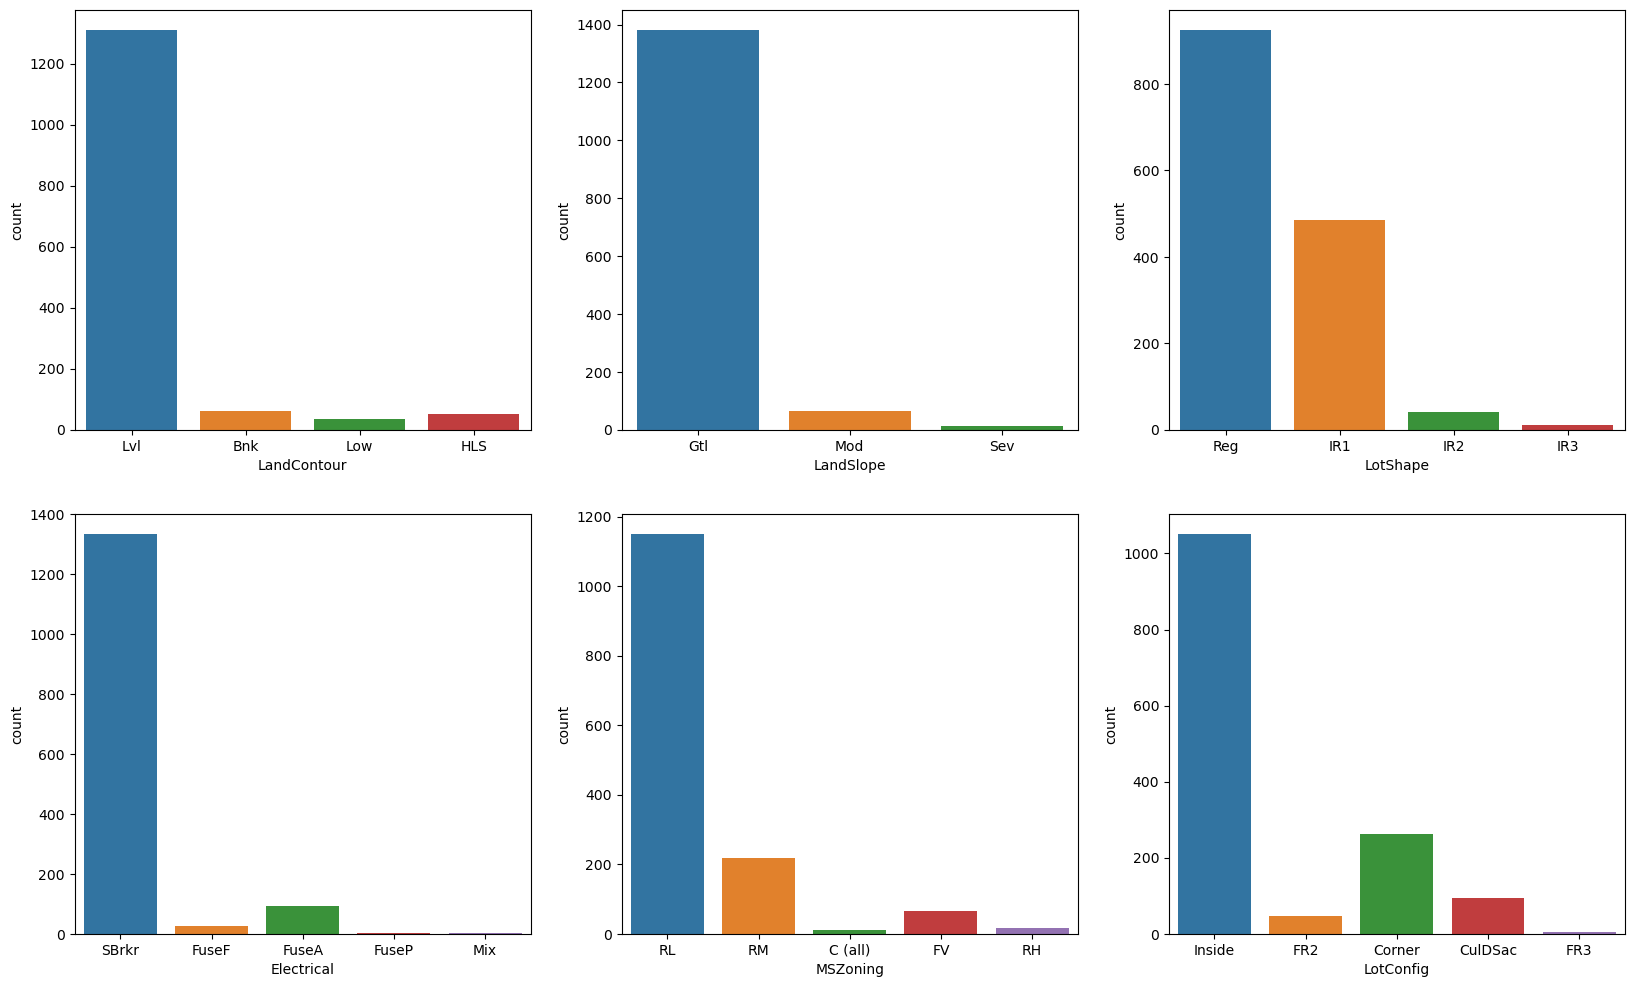

In [46]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.countplot(x = 'LandContour',  data = surp_df)
plt.subplot(2,3,2)
sns.countplot(x = 'LandSlope', data = surp_df)
plt.subplot(2,3,3)
sns.countplot(x = 'LotShape', data = surp_df)
plt.subplot(2,3,4)
sns.countplot(x = 'Electrical', data = surp_df)
plt.subplot(2,3,5)
sns.countplot(x = 'MSZoning',  data = surp_df)
plt.subplot(2,3,6)
sns.countplot(x = 'LotConfig', data = surp_df)
plt.show()

In [47]:
surp_df['LotConfig'].value_counts()

LotConfig
Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: count, dtype: int64

In [48]:
surp_df.drop(['LandSlope','LandContour','Electrical'],axis=1,inplace=True)

surp_df['MSZoning'] = surp_df['MSZoning'].replace(['RH','C (all)'],'Others')


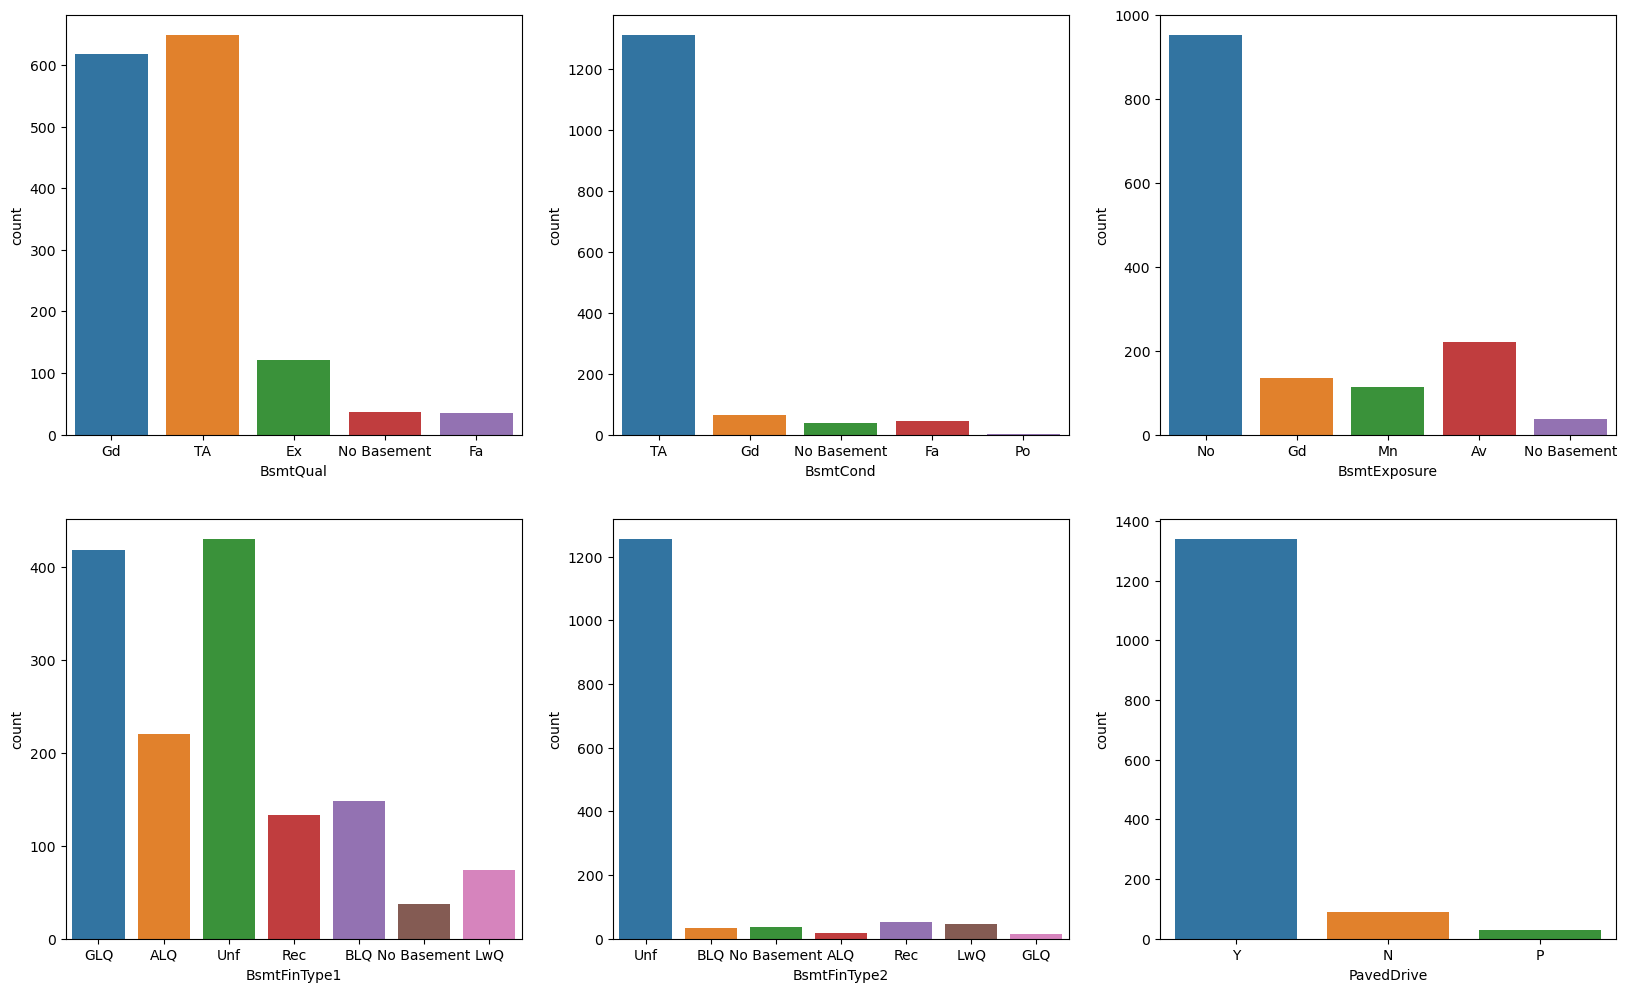

In [49]:

plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.countplot(x = 'BsmtQual',  data = surp_df)
plt.subplot(2,3,2)
sns.countplot(x = 'BsmtCond', data = surp_df)
plt.subplot(2,3,3)
sns.countplot(x = 'BsmtExposure', data = surp_df)
plt.subplot(2,3,4)
sns.countplot(x = 'BsmtFinType1', data = surp_df)
plt.subplot(2,3,5)
sns.countplot(x = 'BsmtFinType2',  data = surp_df)
plt.subplot(2,3,6)
sns.countplot(x = 'PavedDrive', data = surp_df)
plt.show()

In [50]:
surp_df['BsmtCond'].value_counts() # checking skewness for other columns

BsmtCond
TA             1311
Gd               65
Fa               45
No Basement      37
Po                2
Name: count, dtype: int64

In [51]:
surp_df.drop(['BsmtFinType2','PavedDrive','BsmtCond'],axis=1,inplace=True)

In [52]:
surp_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleCondition,SalePrice
0,1,2-STORY 1946 & NEWER,RL,65.0,8450,Reg,Inside,CollgCr,1Fam,2Story,Good,Average,2003,2003,Gable,VinylSd,VinylSd,BrkFace,196.0,Gd,PConc,Gd,No,GLQ,706,0,150,856,Ex,856,854,0,1710,1,0,2,1,3,1,Gd,8,0,Attchd,2003.0,RFn,2,548,0,61,0,0,0,0,0,2,2008,Normal,12.247694
1,2,1-STORY 1946 & NEWER ALL STYLES,RL,80.0,9600,Reg,FR2,Veenker,1Fam,1Story,Above Average,Very Good,1976,1976,Gable,MetalSd,MetalSd,None,0.0,TA,CBlock,Gd,Gd,ALQ,978,0,284,1262,Ex,1262,0,0,1262,0,1,2,0,3,1,TA,6,1,Attchd,1976.0,RFn,2,460,298,0,0,0,0,0,0,5,2007,Normal,12.109011
2,3,2-STORY 1946 & NEWER,RL,68.0,11250,IR1,Inside,CollgCr,1Fam,2Story,Good,Average,2001,2002,Gable,VinylSd,VinylSd,BrkFace,162.0,Gd,PConc,Gd,Mn,GLQ,486,0,434,920,Ex,920,866,0,1786,1,0,2,1,3,1,Gd,6,1,Attchd,2001.0,RFn,2,608,0,42,0,0,0,0,0,9,2008,Normal,12.317167
3,4,2-STORY 1945 & OLDER,RL,60.0,9550,IR1,Corner,Crawfor,1Fam,2Story,Good,Average,1915,1970,Gable,Wd Sdng,Wd Shng,None,0.0,TA,BrkTil,TA,No,ALQ,216,0,540,756,Gd,961,756,0,1717,1,0,1,0,3,1,Gd,7,1,Detchd,1998.0,Unf,3,642,0,35,272,0,0,0,0,2,2006,Abnorml,11.849398
4,5,2-STORY 1946 & NEWER,RL,84.0,14260,IR1,FR2,NoRidge,1Fam,2Story,Very Good,Average,2000,2000,Gable,VinylSd,VinylSd,BrkFace,350.0,Gd,PConc,Gd,Av,GLQ,655,0,490,1145,Ex,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,1,Attchd,2000.0,RFn,3,836,192,84,0,0,0,0,0,12,2008,Normal,12.429216


In [53]:
surp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 58 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   object 
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   LotShape       1460 non-null   object 
 6   LotConfig      1460 non-null   object 
 7   Neighborhood   1460 non-null   object 
 8   BldgType       1460 non-null   object 
 9   HouseStyle     1460 non-null   object 
 10  OverallQual    1460 non-null   object 
 11  OverallCond    1460 non-null   object 
 12  YearBuilt      1460 non-null   int64  
 13  YearRemodAdd   1460 non-null   int64  
 14  RoofStyle      1460 non-null   object 
 15  Exterior1st    1460 non-null   object 
 16  Exterior2nd    1460 non-null   object 
 17  MasVnrType     1460 non-null   object 
 18  MasVnrAr

In [54]:
surp_df['YearSinceRemodel'] = 2010 - ((surp_df['YearRemodAdd'] - surp_df['YearBuilt']) + surp_df['YearBuilt']) #feature engineering

In [55]:
Cat1 = surp_df.select_dtypes(include=['object']) #checking all categorical columns to form dummy variables
Cat1.columns

Index(['MSSubClass', 'MSZoning', 'LotShape', 'LotConfig', 'Neighborhood',
       'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'RoofStyle',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'Foundation',
       'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'HeatingQC', 'KitchenQual',
       'GarageType', 'GarageFinish', 'SaleCondition'],
      dtype='object')

In [56]:
Num = surp_df.select_dtypes(include=['int64','float64']) #all numerical variables
Num.columns

Index(['Id', 'LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice',
       'YearSinceRemodel'],
      dtype='object')

In [57]:
Num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 36 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Id                1460 non-null   int64  
 1   LotFrontage       1460 non-null   float64
 2   LotArea           1460 non-null   int64  
 3   YearBuilt         1460 non-null   int64  
 4   YearRemodAdd      1460 non-null   int64  
 5   MasVnrArea        1460 non-null   float64
 6   BsmtFinSF1        1460 non-null   int64  
 7   BsmtFinSF2        1460 non-null   int64  
 8   BsmtUnfSF         1460 non-null   int64  
 9   TotalBsmtSF       1460 non-null   int64  
 10  1stFlrSF          1460 non-null   int64  
 11  2ndFlrSF          1460 non-null   int64  
 12  LowQualFinSF      1460 non-null   int64  
 13  GrLivArea         1460 non-null   int64  
 14  BsmtFullBath      1460 non-null   int64  
 15  BsmtHalfBath      1460 non-null   int64  
 16  FullBath          1460 non-null   int64  


In [58]:
Cat1 = pd.get_dummies(Cat1,drop_first=True)  # Dummy variables
print(Cat1.shape)

(1460, 130)


In [59]:
Cat1.head()

,MSSubClass_1-1/2 STORY FINISHED ALL AGES,MSSubClass_1-STORY 1945 & OLDER,MSSubClass_1-STORY 1946 & NEWER ALL STYLES,MSSubClass_1-STORY PUD (Planned Unit Development) - 1946 & NEWER,MSSubClass_1-STORY W/FINISHED ATTIC ALL AGES,MSSubClass_2 FAMILY CONVERSION - ALL STYLES AND AGES,MSSubClass_2-1/2 STORY ALL AGES,MSSubClass_2-STORY 1945 & OLDER,MSSubClass_2-STORY 1946 & NEWER,MSSubClass_2-STORY PUD - 1946 & NEWER,MSSubClass_DUPLEX - ALL STYLES AND AGES,MSSubClass_PUD - MULTILEVEL - INCL SPLIT LEV/FOYER,MSSubClass_SPLIT FOYER,MSSubClass_SPLIT OR MULTI-LEVEL,MSZoning_Others,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,BldgType_2fmCon,BldgType_Duplex,...,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_MetalSd,Exterior2nd_Others,Exterior2nd_Plywood,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,Foundation_CBlock,Foundation_Others,Foundation_PConc,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_No Basement,BsmtQual_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_No Basement,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_No Basement,BsmtFinType1_Rec,BsmtFinType1_Unf,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,GarageType_BuiltIn,GarageType_Detchd,GarageType_No Garage,GarageType_Others,GarageFinish_No Garage,GarageFinish_RFn,GarageFinish_Unf,SaleCondition_Normal,SaleCondition_Others,SaleCondition_Partial
0,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,True,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,True,False,False,True,False,False,False,True,False,False,False,True,False,True,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,True,False,False
1,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,True,True,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,True,False,False
2,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,True,False,False,True,False,False,False,True,False,False,False,True,False,True,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,True,False,False
3,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,Fal

In [60]:
# concat dummy variables with main dataset
surp_df = pd.concat([surp_df, Cat1], axis=1) 

In [61]:
surp_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,...,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_MetalSd,Exterior2nd_Others,Exterior2nd_Plywood,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,Foundation_CBlock,Foundation_Others,Foundation_PConc,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_No Basement,BsmtQual_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_No Basement,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_No Basement,BsmtFinType1_Rec,BsmtFinType1_Unf,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,GarageType_BuiltIn,GarageType_Detchd,GarageType_No Garage,GarageType_Others,GarageFinish_No Garage,GarageFinish_RFn,GarageFinish_Unf,SaleCondition_Normal,SaleCondition_Others,SaleCondition_Partial
0,1,2-STORY 1946 & NEWER,RL,65.0,8450,Reg,Inside,CollgCr,1Fam,2Story,Good,Average,2003,2003,Gable,VinylSd,VinylSd,BrkFace,196.0,Gd,PConc,Gd,No,GLQ,706,0,150,856,Ex,856,854,0,1710,1,0,2,1,3,1,Gd,8,0,Attchd,2003.0,RFn,2,548,0,61,0,...,True,False,False,False,False,False,False,True,False,False,True,False,False,False,True,False,False,False,True,False,True,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,True,False,False
1,2,1-STORY 1946 & NEWER ALL STYLES,RL,80.0,9600,Reg,FR2,Veenker,1Fam,1Story,Above Average,Very Good,1976,1976,Gable,MetalSd,MetalSd,None,0.0,TA,CBlock,Gd,Gd,ALQ,978,0,284,1262,Ex,1262,0,0,1262,0,1,2,0,3,1,TA,6,1,Attchd,1976.0,RFn,2,460,298,0,0,...,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,True,True,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,True,False,False
2,3,2-STORY 1946 & NEWER,RL,68.0,11250,IR1,Inside,CollgCr,1Fam,2Story,Good,Average,2001,2002,Gable,VinylSd,VinylSd,BrkFace,162.0,Gd,PConc,Gd,Mn,GLQ,486,0,434,920,Ex,920,866,0,1786,1,0,2,1,3,1,Gd,6,1,Attchd,2001.0,RFn,2,608,0,42,0,...,True,False,False,False,False,False,False,True,False,False,True,False,False,False,True,False,False,False,True,False,True,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,True,False,False
3,4,2-STORY 1945 & OLDER,RL,60.0,9550,IR1,Corner,Crawfor,1Fam,2Story,Good,Average,1915,1970,Gable,Wd Sdng,Wd Shng,None,0.0,TA,BrkTil,TA,No,ALQ,216,0,540,756,Gd,961,756,0,1717,1,0,1,0,3,1,Gd,7,1,Detchd,1998.0,Unf,3,642,0,35,272,...,False,True,False,False,False,False,False,False,False,True,False,True,False,False,False,True,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,True,False,False,False,False,True,False,False,False
4,5,2-STORY 1946 & NEWER,RL,84.0,14260,IR1,FR2,NoRidge,1Fam,2Story,Very Good,Average,2000,2000,Gable,VinylSd,VinylSd,BrkFace,350.0,Gd,PConc,Gd,Av,GLQ,655,0,490,1145,Ex,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,1,Attchd,2000.0,RFn,3,836,192,84,0,...,True,False,False,False,False,False,False,True,False,False,True,False,False,False,True,False,False,False,True,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,

In [62]:
surp_df.drop(['MSZoning', 'LotShape', 'LotConfig', 'Neighborhood', 'BldgType',
       'HouseStyle', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'ExterQual', 'Foundation', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1',
       'HeatingQC', 'KitchenQual', 'GarageType', 'GarageFinish',
       'SaleCondition','Id','OverallCond','MSSubClass','OverallQual'],axis=1,inplace=True) #removing columns as dummy variables already formed

In [63]:
surp_df.head()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,YearSinceRemodel,MSSubClass_1-1/2 STORY FINISHED ALL AGES,MSSubClass_1-STORY 1945 & OLDER,MSSubClass_1-STORY 1946 & NEWER ALL STYLES,MSSubClass_1-STORY PUD (Planned Unit Development) - 1946 & NEWER,MSSubClass_1-STORY W/FINISHED ATTIC ALL AGES,MSSubClass_2 FAMILY CONVERSION - ALL STYLES AND AGES,MSSubClass_2-1/2 STORY ALL AGES,MSSubClass_2-STORY 1945 & OLDER,MSSubClass_2-STORY 1946 & NEWER,MSSubClass_2-STORY PUD - 1946 & NEWER,MSSubClass_DUPLEX - ALL STYLES AND AGES,MSSubClass_PUD - MULTILEVEL - INCL SPLIT LEV/FOYER,MSSubClass_SPLIT FOYER,MSSubClass_SPLIT OR MULTI-LEVEL,MSZoning_Others,...,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_MetalSd,Exterior2nd_Others,Exterior2nd_Plywood,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,Foundation_CBlock,Foundation_Others,Foundation_PConc,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_No Basement,BsmtQual_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_No Basement,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_No Basement,BsmtFinType1_Rec,BsmtFinType1_Unf,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,GarageType_BuiltIn,GarageType_Detchd,GarageType_No Garage,GarageType_Others,GarageFinish_No Garage,GarageFinish_RFn,GarageFinish_Unf,SaleCondition_Normal,SaleCondition_Others,SaleCondition_Partial
0,65.0,8450,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,12.247694,7,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,...,True,False,False,False,False,False,False,True,False,False,True,False,False,False,True,False,False,False,True,False,True,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,True,False,False
1,80.0,9600,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,12.109011,34,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,True,True,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,True,False,False
2,68.0,11250,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,12.317167,8,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,...,True,False,False,False,False,False,False,True,False,False,True,False,False,False,True,False,False,False,True,False,True,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,True,False,False
3,60.0,9550,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,11.849398,40,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,True,False,True,False,False,False,True,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,True,False,False,False,False,True,False,False,False
4,84.0,14260,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,12.429216,10,False,False,False,

In [64]:
surp_df.drop(['YearBuilt','YearRemodAdd','GarageYrBlt','YrSold'],axis=1,inplace=True) #no need of these while making a model 

In [65]:
surp_df.head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,YearSinceRemodel,MSSubClass_1-1/2 STORY FINISHED ALL AGES,MSSubClass_1-STORY 1945 & OLDER,MSSubClass_1-STORY 1946 & NEWER ALL STYLES,MSSubClass_1-STORY PUD (Planned Unit Development) - 1946 & NEWER,MSSubClass_1-STORY W/FINISHED ATTIC ALL AGES,MSSubClass_2 FAMILY CONVERSION - ALL STYLES AND AGES,MSSubClass_2-1/2 STORY ALL AGES,MSSubClass_2-STORY 1945 & OLDER,MSSubClass_2-STORY 1946 & NEWER,MSSubClass_2-STORY PUD - 1946 & NEWER,MSSubClass_DUPLEX - ALL STYLES AND AGES,MSSubClass_PUD - MULTILEVEL - INCL SPLIT LEV/FOYER,MSSubClass_SPLIT FOYER,MSSubClass_SPLIT OR MULTI-LEVEL,MSZoning_Others,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,...,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_MetalSd,Exterior2nd_Others,Exterior2nd_Plywood,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,Foundation_CBlock,Foundation_Others,Foundation_PConc,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_No Basement,BsmtQual_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_No Basement,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_No Basement,BsmtFinType1_Rec,BsmtFinType1_Unf,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,GarageType_BuiltIn,GarageType_Detchd,GarageType_No Garage,GarageType_Others,GarageFinish_No Garage,GarageFinish_RFn,GarageFinish_Unf,SaleCondition_Normal,SaleCondition_Others,SaleCondition_Partial
0,65.0,8450,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2,548,0,61,0,0,0,0,0,2,12.247694,7,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,...,True,False,False,False,False,False,False,True,False,False,True,False,False,False,True,False,False,False,True,False,True,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,True,False,False
1,80.0,9600,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,2,460,298,0,0,0,0,0,0,5,12.109011,34,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,True,True,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,True,False,False
2,68.0,11250,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2,608,0,42,0,0,0,0,0,9,12.317167,8,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,...,True,False,False,False,False,False,False,True,False,False,True,False,False,False,True,False,False,False,True,False,True,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,True,False,False
3,60.0,9550,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,3,642,0,35,272,0,0,0,0,2,11.849398,40,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,...,False,True,False,False,False,False,False,False,False,True,False,True,False,False,False,True,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,True,False,False,False,False,True,False,False,False
4,84.0,14260,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,3,836,192,84,0,0,0,0,0,12,12.429216,10,False,False,False,False,Fals

In [66]:
# Putting feature variable to X
X = surp_df.drop(['SalePrice'], axis=1)

X.head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YearSinceRemodel,MSSubClass_1-1/2 STORY FINISHED ALL AGES,MSSubClass_1-STORY 1945 & OLDER,MSSubClass_1-STORY 1946 & NEWER ALL STYLES,MSSubClass_1-STORY PUD (Planned Unit Development) - 1946 & NEWER,MSSubClass_1-STORY W/FINISHED ATTIC ALL AGES,MSSubClass_2 FAMILY CONVERSION - ALL STYLES AND AGES,MSSubClass_2-1/2 STORY ALL AGES,MSSubClass_2-STORY 1945 & OLDER,MSSubClass_2-STORY 1946 & NEWER,MSSubClass_2-STORY PUD - 1946 & NEWER,MSSubClass_DUPLEX - ALL STYLES AND AGES,MSSubClass_PUD - MULTILEVEL - INCL SPLIT LEV/FOYER,MSSubClass_SPLIT FOYER,MSSubClass_SPLIT OR MULTI-LEVEL,MSZoning_Others,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,...,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_MetalSd,Exterior2nd_Others,Exterior2nd_Plywood,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,Foundation_CBlock,Foundation_Others,Foundation_PConc,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_No Basement,BsmtQual_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_No Basement,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_No Basement,BsmtFinType1_Rec,BsmtFinType1_Unf,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,GarageType_BuiltIn,GarageType_Detchd,GarageType_No Garage,GarageType_Others,GarageFinish_No Garage,GarageFinish_RFn,GarageFinish_Unf,SaleCondition_Normal,SaleCondition_Others,SaleCondition_Partial
0,65.0,8450,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2,548,0,61,0,0,0,0,0,2,7,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,True,...,True,False,False,False,False,False,False,True,False,False,True,False,False,False,True,False,False,False,True,False,True,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,True,False,False
1,80.0,9600,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,2,460,298,0,0,0,0,0,0,5,34,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,...,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,True,True,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,True,False,False
2,68.0,11250,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2,608,0,42,0,0,0,0,0,9,8,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,...,True,False,False,False,False,False,False,True,False,False,True,False,False,False,True,False,False,False,True,False,True,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,True,False,False
3,60.0,9550,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,3,642,0,35,272,0,0,0,0,2,40,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,...,False,True,False,False,False,False,False,False,False,True,False,True,False,False,False,True,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,True,False,False,False,False,True,False,False,False
4,84.0,14260,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,3,836,192,84,0,0,0,0,0,12,10,False,False,False,False,False,False,False,False,True,

In [67]:
# Putting response variable to y
y = surp_df['SalePrice']

y.head()

0    12.247694
1    12.109011
2    12.317167
3    11.849398
4    12.429216
Name: SalePrice, dtype: float64

### Build the Model

In [68]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=100)

In [69]:
scaler = StandardScaler()

X_train[['LotFrontage', 'LotArea','MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'TotRmsAbvGrd', 'Fireplaces','GarageCars', 'GarageArea',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal']] = scaler.fit_transform(X_train[['LotFrontage', 'LotArea','MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'TotRmsAbvGrd', 'Fireplaces','GarageCars', 'GarageArea',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal']])

X_train.head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YearSinceRemodel,MSSubClass_1-1/2 STORY FINISHED ALL AGES,MSSubClass_1-STORY 1945 & OLDER,MSSubClass_1-STORY 1946 & NEWER ALL STYLES,MSSubClass_1-STORY PUD (Planned Unit Development) - 1946 & NEWER,MSSubClass_1-STORY W/FINISHED ATTIC ALL AGES,MSSubClass_2 FAMILY CONVERSION - ALL STYLES AND AGES,MSSubClass_2-1/2 STORY ALL AGES,MSSubClass_2-STORY 1945 & OLDER,MSSubClass_2-STORY 1946 & NEWER,MSSubClass_2-STORY PUD - 1946 & NEWER,MSSubClass_DUPLEX - ALL STYLES AND AGES,MSSubClass_PUD - MULTILEVEL - INCL SPLIT LEV/FOYER,MSSubClass_SPLIT FOYER,MSSubClass_SPLIT OR MULTI-LEVEL,MSZoning_Others,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,...,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_MetalSd,Exterior2nd_Others,Exterior2nd_Plywood,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,Foundation_CBlock,Foundation_Others,Foundation_PConc,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_No Basement,BsmtQual_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_No Basement,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_No Basement,BsmtFinType1_Rec,BsmtFinType1_Unf,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,GarageType_BuiltIn,GarageType_Detchd,GarageType_No Garage,GarageType_Others,GarageFinish_No Garage,GarageFinish_RFn,GarageFinish_Unf,SaleCondition_Normal,SaleCondition_Others,SaleCondition_Partial
210,-0.115302,-0.473765,-0.558025,0.043512,-0.293313,-0.374367,-0.430911,-0.765065,-0.787597,-0.124502,-1.228053,1.066863,-0.247791,-1.026085,-0.751723,-1.042717,-0.234155,-0.935650,-0.925422,-2.366798,-2.217786,-0.743160,-0.709347,1.150231,-0.121922,-0.275126,-0.062302,-0.084263,4,60,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,...,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,True,True,False,False,False,False,False,True,False,False,True,False,False,False,False,False,True,False,False,False,False,True,False,False,True,False,False,True,False,True,False,False,True,False,False
318,0.926898,-0.056845,0.809137,1.160345,-0.293313,-0.454644,0.621579,0.511914,2.140556,-0.124502,2.123103,1.066863,-0.247791,0.786428,1.246998,1.396261,-0.234155,1.556976,0.623522,1.645101,0.867506,1.989482,0.197980,1.910043,-0.121922,-0.275126,-0.062302,-0.084263,4,17,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,True,...,False,False,False,True,False,False,False,False,False,False,True,False,False,False,True,False,False,False,True,False,True,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,True,False,False
239,-0.794998,-0.169324,-0.558025,-0.761296,-0.293313,0.171964,-0.712011,-0.930972,0.795996,-0.124502,-0.056465,-0.837450,-0.247791,-1.026085,1.246998,0.176772,-0.234155,0.310663,0.623522,-1.029498,-1.183084,-0.743160,1.407748,-0.369395,-0.121922,-0.275126,-0.062302,-0.084263,4,60,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,...,True,False,False,False,False,False,False,True,False,False,False,True,False,False,False,True,True,False,False,False,False,False,True,False,False,True,False,False,False,True,False,False,False,False,False,False,True,False,False,True,False,True,False,False,False,False,True,True,False,False
986,-0.477806,-0.502297,-0.558025,-0.963574,-0.293313,-0.175904,-1.256778,-0.4206

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=100)

### Ridge Regression


In [71]:
# list of alphas to tune
params = {'alpha': [0.00004,0.0001, 0.001, 0.01, 0.1, 10,100,1000]}


ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'r2', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [4e-05, 0.0001, 0.001, 0.01, 0.1, 10, 100,
                                   1000]},
             return_train_score=True, scoring='r2', verbose=1)

In [72]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=100]
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.027220,0.009288,0.008072,0.004404,0.00004,{'alpha': 4e-05},0.868246,0.777081,0.838201,0.890474,0.892432,0.853287,0.042834,5,0.924369,0.935767,0.931027,0.919954,0.918905,0.926004,0.006484
1,0.017802,0.005993,0.012556,0.003135,0.0001,{'alpha': 0.0001},0.868247,0.777081,0.838201,0.890476,0.892436,0.853288,0.042836,4,0.924369,0.935767,0.931027,0.919954,0.918905,0.926004,0.006484
2,0.015721,0.000157,0.012878,0.006460,0.001,{'alpha': 0.001},0.868258,0.777072,0.838200,0.890516,0.892499,0.853309,0.042858,3,0.924369,0.935767,0.931027,0.919954,0.918905,0.926004,0.006484
3,0.021169,0.005916,0.015191,0.001379,0.01,{'alpha': 0.01},0.868367,0.776981,0.838188,0.890866,0.893107,0.853502,0.043071,2,0.924368,0.935766,0.931026,0.919953,0.918902,0.926003,0.006484
4,0.017715,0.007007,0.014466,0.002331,0.1,{'alpha': 0.1},0.869382,0.776055,0.838034,0.892791,0.897577,0.854768,0.044649,1,0.924329,0.935711,0.930967,0.919904,0.918744,0.925931,0.006505


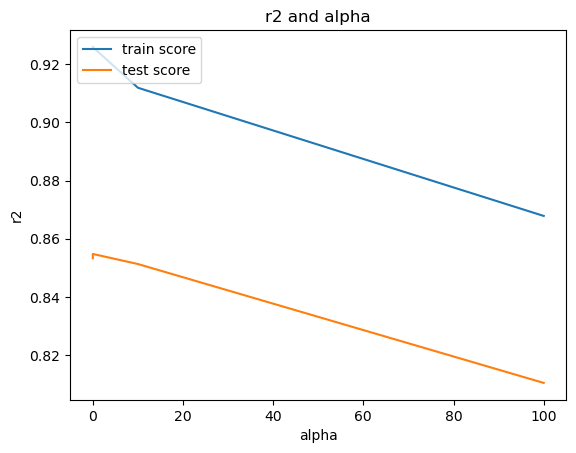

In [73]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('r2')
plt.title("r2 and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [74]:
#optimum alpha

alpha = 10
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([-4.74809780e-04,  1.59466646e-06,  6.17112057e-06,  3.73538624e-06,
        1.15081437e-05,  1.82053056e-05,  3.34488367e-05,  7.92009095e-05,
        1.09011751e-04, -7.70408570e-05,  1.11171801e-04,  4.25420135e-02,
        1.51319614e-02,  5.09516505e-02,  3.69272171e-02,  9.07794039e-03,
       -8.12648652e-02,  8.30696546e-03,  3.96097675e-02,  5.34751466e-02,
        3.43279188e-05,  9.90267283e-05, -5.47707192e-05,  1.22380757e-04,
        1.94886076e-04,  2.27453067e-04, -4.04142867e-04, -3.68907754e-06,
        5.21312292e-04, -1.59513446e-03,  1.22746032e-02, -8.43053932e-02,
        4.98263439e-02,  5.96932189e-03,  1.37128949e-04, -1.20780328e-02,
        2.35023365e-02,  2.51877006e-02, -1.48351396e-05, -4.06689958e-02,
        1.48370219e-02, -2.89980792e-02,  2.13765700e-02,  9.23512984e-03,
       -7.75969900e-02,  1.25978119e-02, -2.93034632e-02,  2.18691748e-02,
       -4.94699235e-02,  7.41424037e-03,  3.66405387e-02, -3.24003086e-02,
       -1.39715714e-02, -

In [75]:
ridge.score(X_train,y_train)

0.9092068605070026

In [76]:
ridge.score(X_test,y_test)

0.8744204967072813

In [77]:
# Ridge model parameters
model_parameters = list(sorted(ridge.coef_))
model_parameters.insert(0, ridge.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))

[('constant', 11.541),
 ('LotFrontage', -0.143),
 ('LotArea', -0.091),
 ('MasVnrArea', -0.084),
 ('BsmtFinSF1', -0.084),
 ('BsmtFinSF2', -0.082),
 ('BsmtUnfSF', -0.081),
 ('TotalBsmtSF', -0.078),
 ('1stFlrSF', -0.069),
 ('2ndFlrSF', -0.066),
 ('LowQualFinSF', -0.066),
 ('GrLivArea', -0.064),
 ('BsmtFullBath', -0.062),
 ('BsmtHalfBath', -0.06),
 ('FullBath', -0.055),
 ('HalfBath', -0.054),
 ('BedroomAbvGr', -0.052),
 ('KitchenAbvGr', -0.052),
 ('TotRmsAbvGrd', -0.052),
 ('Fireplaces', -0.052),
 ('GarageCars', -0.051),
 ('GarageArea', -0.051),
 ('WoodDeckSF', -0.051),
 ('OpenPorchSF', -0.05),
 ('EnclosedPorch', -0.049),
 ('3SsnPorch', -0.048),
 ('ScreenPorch', -0.048),
 ('PoolArea', -0.046),
 ('MiscVal', -0.042),
 ('MoSold', -0.041),
 ('YearSinceRemodel', -0.033),
 ('MSSubClass_1-1/2 STORY FINISHED ALL AGES', -0.032),
 ('MSSubClass_1-STORY 1945 & OLDER', -0.032),
 ('MSSubClass_1-STORY 1946 & NEWER ALL STYLES', -0.032),
 ('MSSubClass_1-STORY PUD (Planned Unit Development) - 1946 & NEWER',

## Lasso Regression

In [78]:
params = {'alpha': [0.00006,0.0006, 0.0008, 0.001, 0.002, 0.004, 0.006, 0.008 ]}
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'r2', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [6e-05, 0.0006, 0.0008, 0.001, 0.002, 0.004,
                                   0.006, 0.008]},
             return_train_score=True, scoring='r2', verbose=1)

In [79]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.193182,0.068836,0.009301,0.009184,0.00006,{'alpha': 6e-05},0.872325,0.773018,0.839580,0.895919,0.900113,0.856191,0.046822,1,0.923862,0.935108,0.930417,0.919443,0.917980,0.925362,0.006517
1,0.047475,0.016352,0.007848,0.006987,0.0006,{'alpha': 0.0006},0.884401,0.724748,0.835348,0.898012,0.909453,0.850393,0.067713,2,0.911534,0.923960,0.918723,0.907989,0.903086,0.913058,0.007462
2,0.059869,0.011684,0.013554,0.007388,0.0008,{'alpha': 0.0008},0.883902,0.709901,0.832624,0.895453,0.906264,0.845629,0.072409,3,0.906265,0.920044,0.913821,0.903300,0.897012,0.908088,0.008059
3,0.048103,0.012828,0.013152,0.007135,0.001,{'alpha': 0.001},0.883078,0.699448,0.827873,0.892849,0.903450,0.841339,0.075588,4,0.901000,0.916719,0.909043,0.898351,0.892075,0.903438,0.008588
4,0.040944,0.007579,0.005038,0.006467,0.002,{'alpha': 0.002},0.877497,0.652922,0.806379,0.884122,0.884969,0.821178,0.089143,5,0.881651,0.901967,0.888512,0.880169,0.871710,0.884802,0.010111


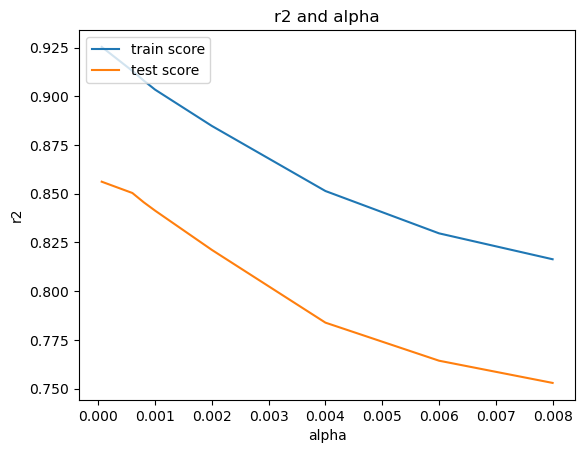

In [80]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('r2')

plt.title("r2 and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [81]:
#optimum alpha

alpha =0.001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=0.001)

In [82]:
lasso.coef_

array([-4.09356126e-04,  1.41043514e-06,  1.80666838e-05,  4.75861642e-05,
        4.91108947e-05,  5.55828023e-05,  3.22848128e-05,  1.72776225e-04,
        1.95176491e-04, -2.93129965e-05,  2.33960625e-05,  4.05631982e-02,
        8.97338843e-04,  4.46795488e-02,  3.11477938e-02,  1.36517476e-03,
       -9.96565920e-02,  9.16320797e-03,  4.00955714e-02,  6.11563721e-02,
        3.68096081e-05,  1.11663349e-04, -4.88469932e-05,  1.16324360e-04,
        1.94148996e-04,  2.48687005e-04, -4.72011474e-04, -3.65282465e-06,
        4.33777426e-04, -2.04610388e-03,  0.00000000e+00, -1.01268932e-01,
        3.91866781e-02,  0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
        0.00000000e+00,  0.00000000e+00, -0.00000000e+00, -4.15042585e-02,
        0.00000000e+00, -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -7.80791267e-02,  7.18055960e-03, -3.22277887e-02,  0.00000000e+00,
       -3.77577996e-03,  0.00000000e+00,  3.38538223e-02, -0.00000000e+00,
       -0.00000000e+00, -

In [83]:
lasso.score(X_train,y_train)

0.898288939025357

In [84]:
lasso.score(X_test,y_test)

0.8646575331441892

In [85]:
# lasso model parameters
model_parameters = list(sorted(lasso.coef_))
model_parameters.insert(0, lasso.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
list((zip(cols, model_parameters)))

[('constant', 11.482),
 ('LotFrontage', -0.21),
 ('LotArea', -0.101),
 ('MasVnrArea', -0.1),
 ('BsmtFinSF1', -0.086),
 ('BsmtFinSF2', -0.083),
 ('BsmtUnfSF', -0.078),
 ('TotalBsmtSF', -0.066),
 ('1stFlrSF', -0.057),
 ('2ndFlrSF', -0.055),
 ('LowQualFinSF', -0.053),
 ('GrLivArea', -0.052),
 ('BsmtFullBath', -0.042),
 ('BsmtHalfBath', -0.039),
 ('FullBath', -0.037),
 ('HalfBath', -0.035),
 ('BedroomAbvGr', -0.034),
 ('KitchenAbvGr', -0.032),
 ('TotRmsAbvGrd', -0.032),
 ('Fireplaces', -0.03),
 ('GarageCars', -0.029),
 ('GarageArea', -0.025),
 ('WoodDeckSF', -0.024),
 ('OpenPorchSF', -0.022),
 ('EnclosedPorch', -0.018),
 ('3SsnPorch', -0.018),
 ('ScreenPorch', -0.017),
 ('PoolArea', -0.017),
 ('MiscVal', -0.017),
 ('MoSold', -0.017),
 ('YearSinceRemodel', -0.016),
 ('MSSubClass_1-1/2 STORY FINISHED ALL AGES', -0.012),
 ('MSSubClass_1-STORY 1945 & OLDER', -0.012),
 ('MSSubClass_1-STORY 1946 & NEWER ALL STYLES', -0.01),
 ('MSSubClass_1-STORY PUD (Planned Unit Development) - 1946 & NEWER', -0

## Conclusion :

- we got a decent score for both Ridge and Lasso regression.
- Ridge : Train :90.9    Test :87.4
- Lasso : Train :89.8    Test :86.4

### Top 5 most significant variables in Ridge are:
- ('GarageFinish_RFn', 0.092)
- ('GarageFinish_Unf', 0.094)
- ('SaleCondition_Normal', 0.099)
- ('SaleCondition_Others', 0.105)
- ('SaleCondition_Partial', 0.143)
 

### Top 5 most significant variables in Lasso are:
- ('SaleCondition_Partial', 0.198)
- ('SaleCondition_Others', 0.12)
- ('SaleCondition_Normal', 0.098)
- ('GarageFinish_Unf',  0.084)
- ('GarageFinish_RFn', 0.079)


### These Varaiables are directly proportional to each other.

- Optimal Value of alpha for ridge : 0.10
- Optimal Value of alpha for Lasso : 0.001

### Because of Feature selection as well we can choose Lasso regression in this case.

 



 